## Importing the Libraries 

In [341]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [343]:
data = pd.read_csv("Data/2006Fall_2017Spring_GOES_meteo_combined.csv")
data.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


## Preprocessing The Dataset

In [345]:
column_names = data.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [346]:

# Renaming
data.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

data.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [347]:
data = data.replace(['m', 'M'], '0')

In [355]:
 data= data.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
data = data.reset_index(drop=True)

In [357]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(data)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,2941,0.065095
File_name_for_2D_lake,2941,0.065095
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


In [19]:
data = data.dropna()
print('Total observation count after missing value treatment: ', len(data))

Total observation count after missing value treatment:  44942


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [23]:
# Using apply method
columns = data.columns
data[columns[8:]] = data[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               44942 non-null  object 
 1   Time_UTC               44942 non-null  object 
 2   Date_CST               44942 non-null  object 
 3   Time_CST               44942 non-null  object 
 4   File_name_for_1D_lake  44942 non-null  object 
 5   File_name_for_2D_lake  44942 non-null  object 
 6   Lake_data_1D           44942 non-null  object 
 7   Lake_data_2D           44942 non-null  object 
 8   Temp_F                 44942 non-null  float64
 9   RH_pct                 44942 non-null  float64
 10  Dewpt_F                44942 non-null  float64
 11  Wind_Spd_mph           44942 non-null  int64  
 12  Wind_Direction_deg     44942 non-null  int64  
 13  Peak_Wind_Gust_mph     44942 non-null  int64  
 14  Low_Cloud_Ht_ft        44942 non-null  int64  
 15  Med_Clo

In [27]:
filtered_data = data.loc[(data['Time_UTC'] >= '14:00')
                     & (data['Time_UTC'] <= '21:00')]
filtered_data

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,20,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,330,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,310,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0


In [29]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [31]:
filtered_data.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [33]:
print('Total observations: ', filtered_data.shape[0])
print('Total number of features: ', filtered_data.shape[1])

Total observations:  14951
Total number of features:  22


In [35]:
data_sample = data['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

## Generating Cloud Images by taking the Latitude and Longitude from the Lake 1D Labels

In [37]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig('/Users/kaushikkaranam/Documents/Neural_Project/Images_Final' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code


### Reading the Lat and Long Dataset

In [39]:
df_lat_lon = df_lat_lon = pd.read_csv("Data/lat_long_1D_labels_for_plotting.csv")
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [41]:
df_lat_lon.shape

(3599, 2)

In [43]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [45]:
data_sample = filtered_data['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [47]:
data_sample2 = filtered_data['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

## 1D Conversion using co-ordinates

In [49]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [51]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [53]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [55]:
data_sample_lst2 = [float(el) for el in filtered_data['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [57]:
data_sample_lst == data_sample_lst2

True

In [59]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')

0

In [61]:
filtered_data.loc[5177]

Date_UTC                                                        2008-01-18
Time_UTC                                                             15:00
Date_CST                                                        2008-01-18
Time_CST                                                             15:00
File_name_for_1D_lake            goes11.2008.01.18.1500.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.18.1500.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.0525, 0.055, 0.06, 0.0425, 0.06, 0.055, 0.0...
Lake_data_2D             [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...
Temp_F                                                                20.0
RH_pct                                                                77.0
Dewpt_F                                                               14.0
Wind_Spd_mph                                                            11
Wind_Direction_deg                                                     250
Peak_Wind_Gust_mph       

In [63]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_data['Lake_data_1D'][5177]), 'sample')

0

In [65]:
data['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [67]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

In [69]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_data['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample')

0

In [71]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_data['Lake_data_1D'][5177]), 
             'sample')

0

## Remove the colormap and axis to clean images

In [73]:

def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        
        plt.savefig(f'/Users/kaushikkaranam/Documents/Neural_Project/Images_Final' + fig_name + '.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

In [75]:
for i, row in data.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
        break

[0.012499999, 0.0075, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.01, 0.005, 0.01, 0.0075, 0.0075, 0.0175, 0.012499999, 0.012499999, 0.01, 0.012499999, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.012499999, 0.015, 0.0025, 0.01, 0.015, 0.0025, 0.012499999, 0.01, 0.015, 0.022499999, 0.012499999, 0.015, 0.0075, 0.0025, 0.02, 0.015, 0.0075, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.01, 0.0025, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.01, 0.0025, 0.005, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0175, 0.005, 0.012499999, 0.0075, 0.015, 0.012499999, 0.0075, 0.012499999, 0.012499999, 0.0075, 0.02, 0.0075, 0.01, 0.015, 0.0175, 0.012499999, 0.012499999, 0.0025, 0.0075, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.005, 0.015, 0.012499999, 0.012499999, 0.022499999, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.015, 0.012499999, 0.015, 0.015, 0.0

## Image Generation to a file in local

* The code is commented out below because of the kernel error occurring while running the notebook after generating the images into local.

In [115]:
 # from tqdm import tqdm
 # for i, row in tqdm(filtered_data.iterrows()):

 #     try:
 #         #arr = np.array(eval(row.Lake_data_1D))
 #         arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
 #         arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
 #     except: # If no data is available (fill with zeros)
 #         #txt = row.Lake_data_1D
 #         #txt = txt.replace('nan', '0')
 #         #arr = np.array(eval(txt))
 #         print("oopsie at row:", i)

14951it [13:36, 18.32it/s]


In [117]:
from tqdm import tqdm
for i, row in tqdm(data.iterrows()):
    try:
        if 12921 == i:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, 'sample')
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

44942it [00:01, 32780.70it/s]


Grey scale error 

In [119]:
# def arrays_2_png_data_regen(lat, lon, val, fig_name, folder_name):
#     status_code = -1

#     if len(lat) == len(lon) == len(val):
#         plt.figure(figsize=(10, 10))
#         plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
#         plt.axis('off')
#         plt.savefig(folder_name + '/' + fig_name +'.png')
#         plt.close()
#         status_code = 0
#     else:
#         status_code = 255

#     return status_code

In [109]:
# for i, row in tqdm(data.iterrows()):
#     try:
#         if 10127 <= i <= 13046:
#             #arr = np.array(eval(row.Lake_data_1D))
#             arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
#             arrays_2_png_data_regen(lat_lst, lon_lst, arr, str(i), "/Users/gouthammathew/Desktop/final project/imagesregen")
#     except: # If no data is available (fill with zeros)
#         #txt = row.Lake_data_1D
#         #txt = txt.replace('nan', '0')
#         #arr = np.array(eval(txt))
#         print("oopsie at row", str(i))

In [121]:
from tqdm import tqdm
for i, row in tqdm(data.iterrows()):
    try:
        if i == 12969:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, 'sample', "/Users/kaushikkaranam/Documents/Neural_Project/Images_Final")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

44942it [00:00, 85888.84it/s]


In [77]:
filtered_data.loc[12969]

Date_UTC                                                        2013-01-19
Time_UTC                                                             19:00
Date_CST                                                        2013-01-19
Time_CST                                                             19:00
File_name_for_1D_lake            goes15.2013.01.19.1900.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes15.2013.01.19.1900.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.32, 0.275, 0.2875, 0.3075, 0.4175, 0.44, 0....
Lake_data_2D             [array([   nan,    nan,    nan,    nan,    nan...
Temp_F                                                                39.0
RH_pct                                                                81.0
Dewpt_F                                                               34.0
Wind_Spd_mph                                                            10
Wind_Direction_deg                                                     220
Peak_Wind_Gust_mph       

In [79]:
filtered_data['Lake_data_1D'][12969]

'[0.32, 0.275, 0.2875, 0.3075, 0.4175, 0.44, 0.42249998, 0.39, 0.39999998, 0.44, 0.42749998, 0.36749998, 0.345, 0.32999998, 0.32, 0.31, 0.3075, 0.33499998, 0.2625, 0.345, 0.33499998, 0.3225, 0.3575, 0.42249998, 0.4375, 0.45749998, 0.4825, 0.4075, 0.39, 0.375, 0.39249998, 0.37, 0.3375, 0.32, 0.2875, 0.25, 0.2825, 0.2575, 0.29749998, 0.295, 0.45, 0.4425, 0.39999998, 0.42749998, 0.48499998, 0.5025, 0.48499998, 0.5, 0.5125, 0.42, 0.36249998, 0.36749998, 0.3875, 0.345, 0.3525, 0.29749998, 0.26749998, 0.26, 0.28, 0.2025, 0.24499999, 0.24499999, 0.2725, 0.4325, 0.4175, 0.4175, 0.4675, 0.48499998, 0.5025, 0.5075, 0.53499997, 0.525, 0.48749998, 0.45, 0.39, 0.3875, 0.355, 0.33499998, 0.275, 0.2325, 0.22749999, 0.1775, 0.17, 0.21249999, 0.29, 0.26, 0.275, 0.29, 0.3525, 0.375, 0.39, 0.39499998, 0.45, 0.465, 0.5175, 0.525, 0.5525, 0.55, 0.5125, 0.5, 0.4025, 0.37, 0.32999998, 0.2925, 0.235, 0.225, 0.1575, 0.1525, 0.1525, 0.1625, 0.16499999, 0.16499999, 0.21499999, 0.25, 0.3575, 0.3575, 0.36249998, 0

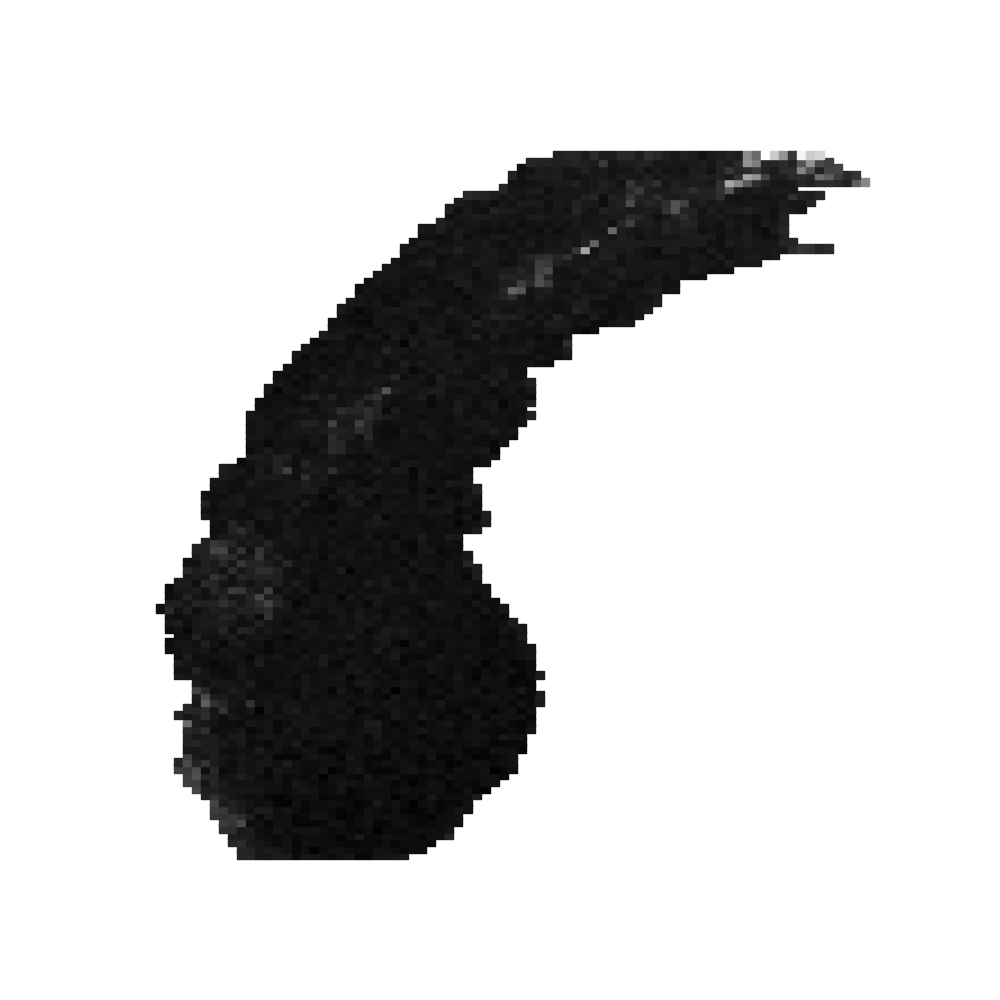

In [81]:
from PIL import Image, ImageOps

img = Image.open('/Users/kaushikkaranam/Documents/Neural_Project/Images_Final39.png')
img

In [83]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860]),
 array([553, 554, 555, ..., 406, 407, 408]))

In [85]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

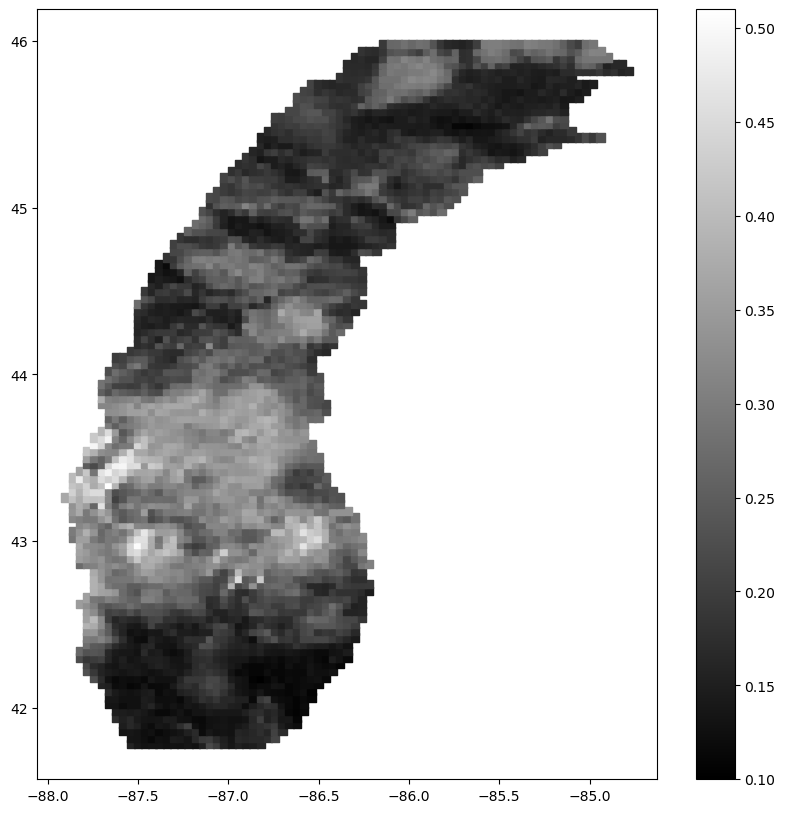

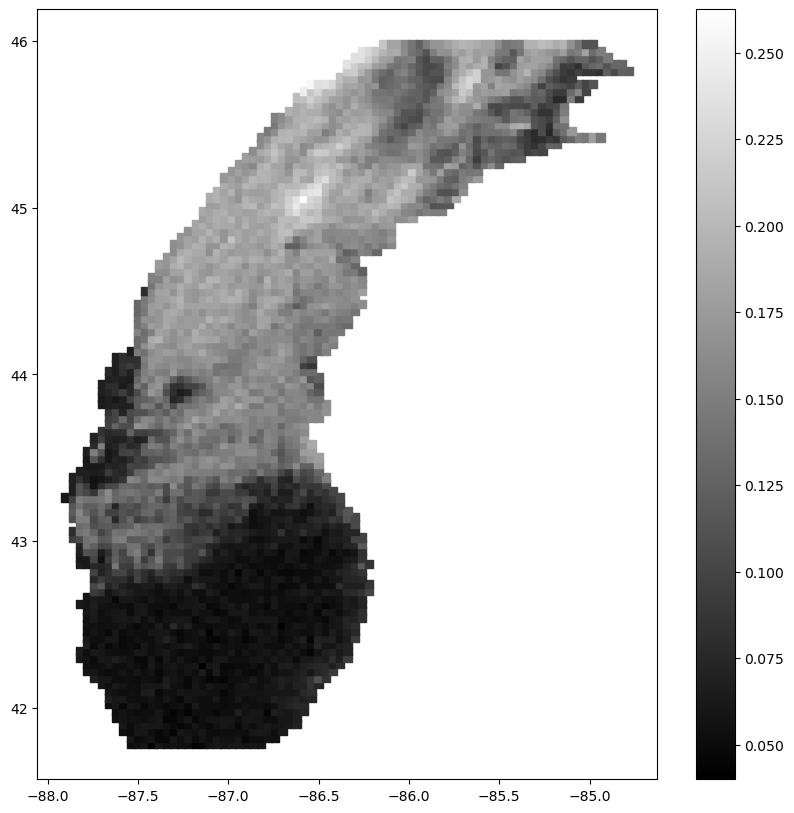

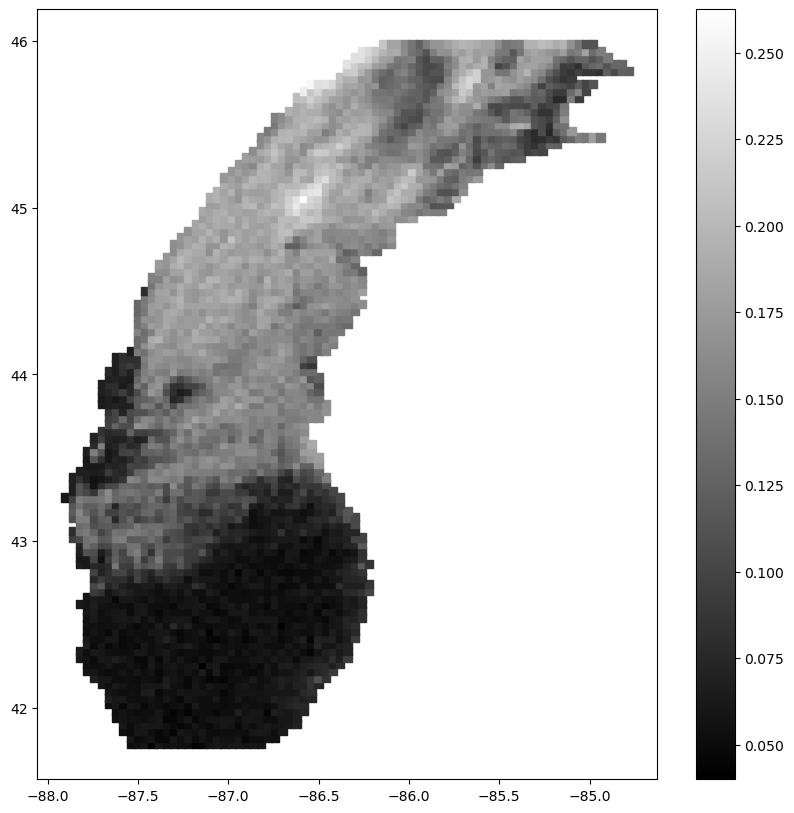

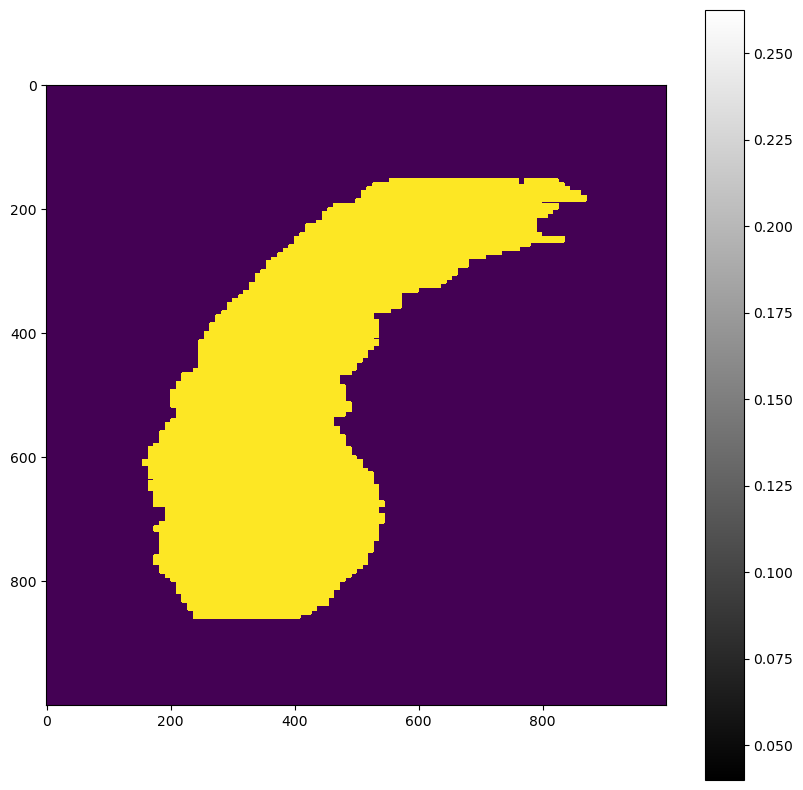

In [87]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

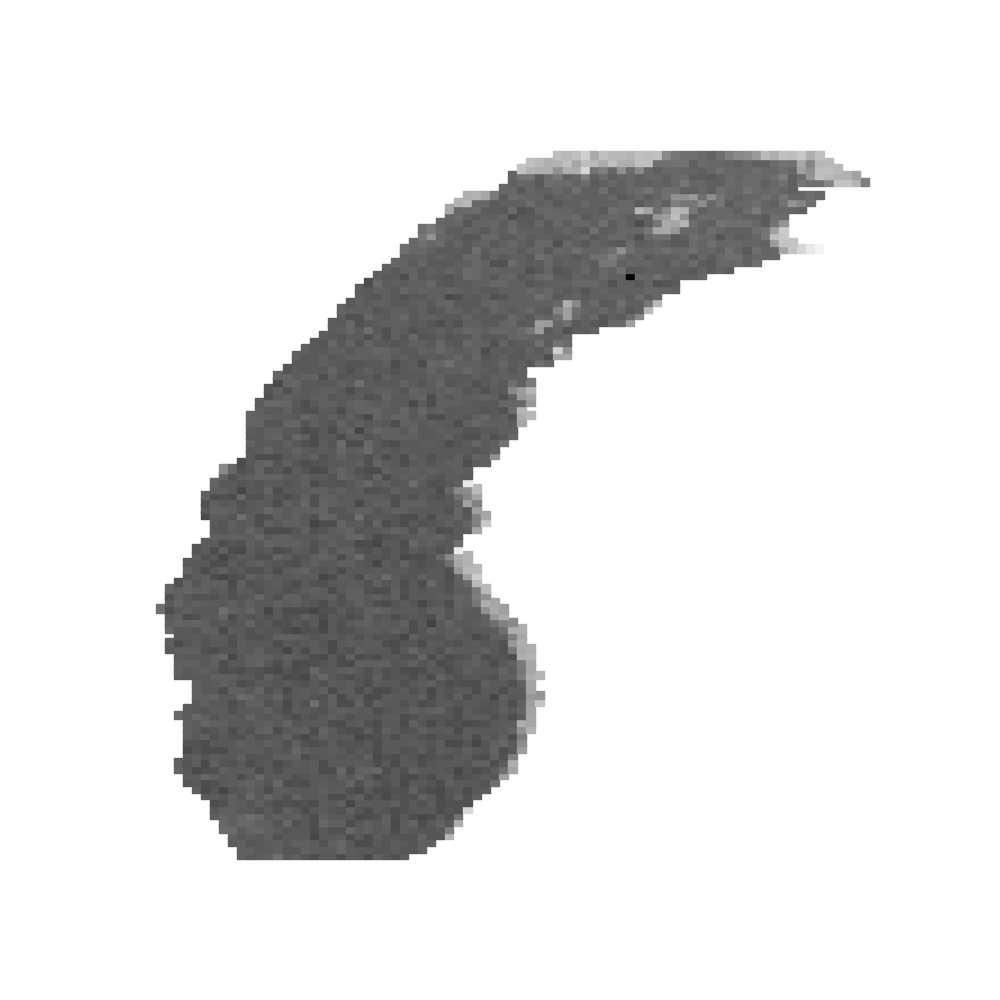

In [89]:
img = Image.open('/Users/kaushikkaranam/Documents/Neural_Project/Images_Final6.png')
img = ImageOps.grayscale(img)
img

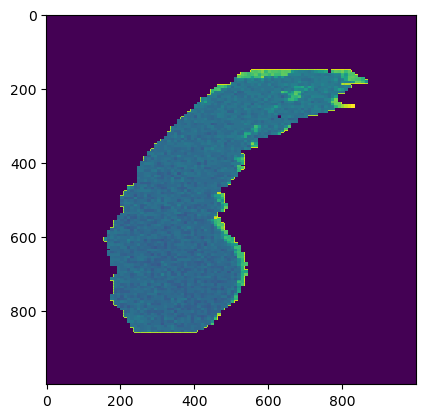

In [91]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')
plt.show()

In [139]:
ImageOps.grayscale(Image.fromarray(newimg))

TypeError: Cannot handle this data type: (1, 1), <i8

In [ ]:

# from PIL import Image, ImageOps
# f = '/Users/gouthammathew/Desktop/final project/images2'
# g = '/Users/gouthammathew/Desktop/final project/IMAGE3'
# for file in tqdm(os.listdir(f)):
#     f_img = f + "/" + file
#     g_img = g + "/" + file
#     img = Image.open(f_img)
#     img = ImageOps.grayscale(img)
#     newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
#     newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
#     newimg64.save(g_img)


In [93]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


### We have generated over 14000 images, but we have taken only 1200 images to train the model because of GPU and kernel constraints.

In [95]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(1200)):
    image_path = '/Users/kaushikkaranam/Documents/Neural_Project/Images_Final' + str(idx) + '.png'
    im = cv2.imread(image_path)

    # Check if the image was successfully read
    if im is not None:
        # Storing 1 channel, since the images are grayscale, and cropping
        images.append(im[8:-8, 8:-8, 0])  # Assuming images are 64x64 pixels
    else:
        print(f"Error reading image at index {idx}. Check if the file exists and is in the correct format.")

100%|████████████████████████████████████| 1200/1200 [00:09<00:00, 123.96it/s]


In [97]:
len(images)

1200

In [99]:
plt.imshow(images[146]) 

Displaying next frames starting at image 214.


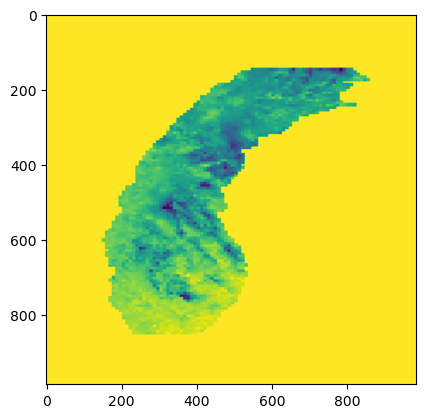

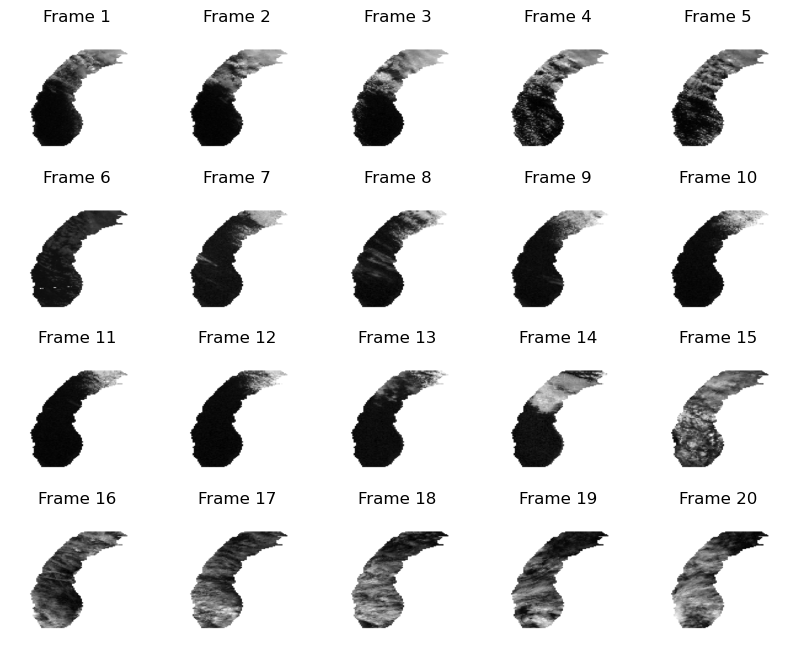

In [101]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

In [103]:
meteo_les = data.drop(
    [ 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 
     'Lake_data_1D', 'Lake_data_2D', 'Dewpt_F', 'Peak_Wind_Gust_mph', 'Altimeter_hPa' ], axis=1)

In [105]:
import tensorflow as tf 
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les, None, 24, sequence_stride=24, sampling_rate=1, 
                                                          batch_size=20000)

In [106]:
for batch in x3:
    print(batch.shape)
    print('--')

(1872, 24, 11)
--


2024-12-11 15:49:48.143602: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [109]:
meteo_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[0:10000], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=10000)

In [111]:
meteo_train = None
for batch in meteo_train_batched:
    meteo_train = batch
    print(meteo_train.shape)
    print('--')

(416, 24, 11)
--


2024-12-11 15:49:49.981768: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [113]:
meteo_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[:5500], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=7500)

In [115]:
meteo_val = None
for batch in meteo_val_batched:
    meteo_val = batch
    print(meteo_val.shape)
    print('--')

(229, 24, 11)
--


# Cloud imagery training and validation datasets¶

In [117]:
cloud_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:10000], None, 8, sequence_stride=8, 
                                                                           sampling_rate=1, batch_size=10000)

In [118]:
cloud_train = None
for batch in cloud_train_batched:
    cloud_train = batch
    cloud_train = np.expand_dims(cloud_train, axis=-1)
    print(cloud_train.shape)
    cloud_train = cloud_train / 255
    print('--')

(150, 8, 984, 984, 1)
--


2024-12-11 15:50:52.992459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [121]:
cloud_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:2500], None, 8, sequence_stride=8, 
                                                                         sampling_rate=1, batch_size=2500)

In [123]:
cloud_val = None
for batch in cloud_val_batched:
    cloud_val = batch
    cloud_val = np.expand_dims(cloud_val, axis=-1)
    print(cloud_val.shape)
    cloud_val = cloud_val / 255
    print('--')

(150, 8, 984, 984, 1)
--


In [125]:
meteo_train.shape

TensorShape([416, 24, 11])

In [127]:
rain_train = []
for batch in meteo_train_batched:
    for i in range(batch.shape[0]):
        print(batch.shape[0])
        print(batch[i,:,-1].numpy())
        print(i)
        break

416
[0.   0.   0.   0.   0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.  ]
0


In [129]:
rain_train = []
for batch in meteo_train_batched:
    for i in range(batch.shape[0]):
        rain_train.append(sum(batch[i,:,-1].numpy()))
        
len(rain_train)

416

In [131]:
print(rain_train)

[0.04, 0.0, 2.02, 0.35, 0.0, 0.0, 0.0, 0.0, 0.02, 0.43000000000000005, 0.17, 0.27, 0.06999999999999999, 0.0, 0.15000000000000002, 0.37, 0.09, 0.09000000000000001, 0.0, 0.29000000000000004, 0.49, 0.08, 0.03, 0.0, 0.0, 0.14, 0.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.21, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.1, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.13, 0.27, 0.09, 0.16, 0.45999999999999996, 0.01, 0.04, 0.0, 0.01, 0.04, 0.0, 0.0, 0.0, 0.0, 0.12, 0.04, 0.07, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.09999999999999998, 0.12000000000000001, 0.0, 0.02, 0.01, 0.03, 0.02, 0.0, 0.08, 0.09, 0.02, 0.0, 0.0, 0.0, 0.0, 0.02, 0.04, 0.05, 0.0, 0.0, 0.03, 0.01, 0.01, 0.05, 0.21000000000000002, 0.03, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.01, 0.04, 0.0, 0.0, 0.0, 0.02, 0.08, 0.0, 0.04, 0.060000000000000005, 0.18000000000000002, 0.01, 0.04, 0.02, 0.01, 

In [133]:
rain_train_b = [1 if 0.10 <= r else 0 for r in rain_train]

In [135]:
len(rain_train)


416

In [137]:
print(rain_train_b)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [139]:
plt.hist(rain_train_b)

(array([353.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  63.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [141]:
rain_train_c = np.array(rain_train_b)
rain_train_c.shape

(416,)

In [143]:
rain_val = []
for batch in meteo_val_batched:
    for i in range(batch.shape[0]):
        rain_val.append(sum(batch[i,:,-1].numpy()))
        
len(rain_val)

2024-12-11 15:52:54.430711: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


229

In [145]:
rain_val_b = [1 if 0.10 <= r else 0 for r in rain_val]

In [147]:
rain_val_c = np.array(rain_val_b)
rain_val_c.shape

(229,)

In [149]:
data.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48.0,86.0,...,150,0,4100,4800,7000,10,984.0,1007.0,1006.8,0.00
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48.0,86.0,...,150,0,6000,0,0,10,983.7,1006.5,1006.4,0.00
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,...,0,0,5500,11000,0,10,982.7,1005.7,1005.4,0.00
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,...,150,0,6000,0,0,10,982.0,1005.1,1004.7,0.00
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48.0,89.0,...,0,0,2200,3500,0,8,982.0,1004.9,1004.7,0.02


## Creating Target Variable

* Precipitation Classification
 This section defines thresholds for precipitation intensity and assigns categories based on domain knowledge.

* A new column, 'precipitation_category', is added to the dataset to represent these categories.
* This classification simplifies the prediction task by grouping continuous precipitation values into meaningful classes.


In [151]:
import pandas as pd

# Load your dataset (replace the file path with the correct one)
# Assuming the data is loaded into a variable named `data`
#data = pd.read_csv("Data/2006Fall_2017Spring_GOES_meteo_combined.csv")

# Define thresholds for precipitation categories
X1 = 0.3  # Less Rain threshold
X2 = 0.8  # Medium Rain threshold

# Function to classify precipitation into categories
def classify_precipitation(precipitation):
    if precipitation == 0:
        return "No Rain"
    elif 0 < precipitation <= X1:
        return "Less Rain"
    elif X1 < precipitation <= X2:
        return "Medium Rain"
    else:
        return "High Rain"

# Create a new column for precipitation categories
data['precipitation_category'] = data['Precip_in'].apply(classify_precipitation)

In [153]:
# Replace 'precip_in' with the exact column name for precipitation in your dataset
unique_values = data['Precip_in'].unique()
print(unique_values)


[0.   0.02 0.01 0.61 1.4  0.22 0.12 0.03 0.05 0.08 0.09 0.04 0.07 0.06
 0.1  0.14 0.11 0.15 0.16 0.13 0.2  0.28 0.32 0.26 0.19 0.18 0.45 0.36
 0.17 0.86 0.34 0.66 0.3  0.74 0.21 0.27 0.25 0.24 0.31]


In [160]:
filtered_data.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


## Sliding Window Implementation 

* This section converts the meteorological data into a sliding window format.
* Sliding windows use past observations (e.g., 24-hour, 48-hour, or 72-hour sequences) as input to predict future precipitation categories.
* The goal is to structure the data for time-series analysis, preserving temporal dependencies.
* Each window is flattened into a sequence of input features, and the target is the precipitation category for the next time period.


In [162]:
# Function to create sliding windows
def create_sliding_window(data, window_size, prediction_offset, feature_columns):
    """
    Create sliding windows for time-series data.
    :param data: DataFrame containing meteorological data
    :param window_size: Number of hours in the sliding window
    :param prediction_offset: Offset hours for the target variable
    :param feature_columns: List of meteorological feature column names
    :return: DataFrame with sliding window inputs and target
    """
    input_features = [f"{col}_t-{i}" for i in range(window_size, 0, -1) for col in feature_columns]
    target_column = f"precipitation_category_t+{prediction_offset}"
    
    sliding_windows = []
    for i in range(len(data) - window_size - prediction_offset):
        input_window = data[feature_columns].iloc[i:i + window_size].values.flatten()
        target = data['precipitation_category'].iloc[i + window_size + prediction_offset]
        sliding_windows.append(list(input_window) + [target])
    
    columns = input_features + [target_column]
    return pd.DataFrame(sliding_windows, columns=columns)

# Define meteorological feature columns
feature_columns = [
    'Temp_F', 'RH_pct', 'Dewpt_F', 'Wind_Spd_mph', 'Wind_Direction_deg',
    'Peak_Wind_Gust_mph', 'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft',
    'High_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa', 'Sea_Lev_Press_hPa',
    'Altimeter_hPa'
]

# Create sliding windows for 24, 48, and 72 hours
window_24 = create_sliding_window(data, window_size=24, prediction_offset=24, feature_columns=feature_columns)
window_48 = create_sliding_window(data, window_size=48, prediction_offset=48, feature_columns=feature_columns)
window_72 = create_sliding_window(data, window_size=72, prediction_offset=72, feature_columns=feature_columns)

# Save the sliding windows to CSV files
window_24.to_csv('sliding_window_24.csv', index=False)
window_48.to_csv('sliding_window_48.csv', index=False)
window_72.to_csv('sliding_window_72.csv', index=False)

print("Sliding windows created and saved!")


Sliding windows created and saved!


In [164]:
data_24 = pd.read_csv("Data/sliding_window_24.csv")

In [166]:
data_24.head(5)

,Temp_F_t-24,RH_pct_t-24,Dewpt_F_t-24,Wind_Spd_mph_t-24,Wind_Direction_deg_t-24,Peak_Wind_Gust_mph_t-24,Low_Cloud_Ht_ft_t-24,Med_Cloud_Ht_ft_t-24,High_Cloud_Ht_ft_t-24,Visibility_mi_t-24,...,Wind_Direction_deg_t-1,Peak_Wind_Gust_mph_t-1,Low_Cloud_Ht_ft_t-1,Med_Cloud_Ht_ft_t-1,High_Cloud_Ht_ft_t-1,Visibility_mi_t-1,Atm_Press_hPa_t-1,Sea_Lev_Press_hPa_t-1,Altimeter_hPa_t-1,precipitation_category_t+24
0,48.0,86.0,44.0,7.0,150.0,0.0,4100.0,4800.0,7000.0,10.0,...,230.0,0.0,0.0,0.0,0.0,9.0,988.0,1010.8,1010.8,Less Rain
1,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,5.0,988.3,0.0,1011.2,No Rain
2,48.0,86.0,44.0,6.0,0.0,0.0,5500.0,11000.0,0.0,10.0,...,0.0,0.0,4200.0,0.0,0.0,5.0,989.0,0.0,1011.9,No Rain
3,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,0.0,0.0,5000.0,0.0,0.0,2.0,989.7,1012.8,1012.5,No Rain
4,48.0,89.0,45.0,5.0,0.0,0.0,2200.0,3500.0,0.0,8.0,...,0.0,0.0,4600.0,0.0,0.0,10.0,990.7,1013.6,1013.5,No Rain


In [168]:
data_48 = pd.read_csv("Data/sliding_window_48.csv")

In [170]:
data_48.head(5)

,Temp_F_t-48,RH_pct_t-48,Dewpt_F_t-48,Wind_Spd_mph_t-48,Wind_Direction_deg_t-48,Peak_Wind_Gust_mph_t-48,Low_Cloud_Ht_ft_t-48,Med_Cloud_Ht_ft_t-48,High_Cloud_Ht_ft_t-48,Visibility_mi_t-48,...,Wind_Direction_deg_t-1,Peak_Wind_Gust_mph_t-1,Low_Cloud_Ht_ft_t-1,Med_Cloud_Ht_ft_t-1,High_Cloud_Ht_ft_t-1,Visibility_mi_t-1,Atm_Press_hPa_t-1,Sea_Lev_Press_hPa_t-1,Altimeter_hPa_t-1,precipitation_category_t+48
0,48.0,86.0,44.0,7.0,150.0,0.0,4100.0,4800.0,7000.0,10.0,...,0.0,0.0,10000.0,12000.0,0.0,10.0,991.7,1014.6,1014.6,No Rain
1,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,10.0,991.3,1014.4,1014.2,No Rain
2,48.0,86.0,44.0,6.0,0.0,0.0,5500.0,11000.0,0.0,10.0,...,140.0,0.0,0.0,0.0,0.0,10.0,991.7,1014.8,1014.6,No Rain
3,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,0.0,0.0,500.0,0.0,0.0,1.0,994.3,0.0,1017.3,No Rain
4,48.0,89.0,45.0,5.0,0.0,0.0,2200.0,3500.0,0.0,8.0,...,270.0,0.0,300.0,0.0,0.0,2.0,994.7,1017.6,1017.6,No Rain


In [172]:
data_72 = pd.read_csv("Data/sliding_window_72.csv")

In [173]:
data_72.head(5)

,Temp_F_t-72,RH_pct_t-72,Dewpt_F_t-72,Wind_Spd_mph_t-72,Wind_Direction_deg_t-72,Peak_Wind_Gust_mph_t-72,Low_Cloud_Ht_ft_t-72,Med_Cloud_Ht_ft_t-72,High_Cloud_Ht_ft_t-72,Visibility_mi_t-72,...,Wind_Direction_deg_t-1,Peak_Wind_Gust_mph_t-1,Low_Cloud_Ht_ft_t-1,Med_Cloud_Ht_ft_t-1,High_Cloud_Ht_ft_t-1,Visibility_mi_t-1,Atm_Press_hPa_t-1,Sea_Lev_Press_hPa_t-1,Altimeter_hPa_t-1,precipitation_category_t+72
0,48.0,86.0,44.0,7.0,150.0,0.0,4100.0,4800.0,7000.0,10.0,...,260.0,0.0,0.0,0.0,0.0,10.0,993.7,1016.6,1016.6,No Rain
1,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,30.0,23.0,1200.0,0.0,0.0,7.0,991.0,1014.0,1013.9,No Rain
2,48.0,86.0,44.0,6.0,0.0,0.0,5500.0,11000.0,0.0,10.0,...,30.0,0.0,1400.0,0.0,0.0,10.0,993.7,1016.8,1016.6,No Rain
3,48.0,86.0,44.0,8.0,150.0,0.0,6000.0,0.0,0.0,10.0,...,20.0,20.0,1600.0,2300.0,0.0,10.0,996.0,1019.2,1019.0,No Rain
4,48.0,89.0,45.0,5.0,0.0,0.0,2200.0,3500.0,0.0,8.0,...,10.0,18.0,1800.0,0.0,0.0,10.0,998.3,1021.3,1021.3,No Rain


## RNN Implementation Using LTSM

In [176]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [178]:
# Load the sliding window data
data_24 = pd.read_csv('sliding_window_24.csv')  # Update path if necessary

# Separate features and target
X = data_24.iloc[:, :-1].values  # Features
y = data_24.iloc[:, -1].values   # Target (precipitation_category)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape features for RNN (samples, timesteps, features)
timesteps = 24
features = X.shape[1] // timesteps
X = X.reshape(-1, timesteps, features)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the RNN Model

In [180]:
# Define the RNN model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(timesteps, features)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model with a reduced learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,364 (130.33 KB)

 Trainable params: 33,172 (129.58 KB)

 Non-trainable params: 192 (768.00 B)

# Train the Model

In [182]:
# Define callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6192 - loss: 1.0352 - val_accuracy: 0.9328 - val_loss: 0.2803 - learning_rate: 1.0000e-04
Epoch 2/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9289 - loss: 0.3166 - val_accuracy: 0.9330 - val_loss: 0.2503 - learning_rate: 1.0000e-04
Epoch 3/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9297 - loss: 0.2792 - val_accuracy: 0.9330 - val_loss: 0.2433 - learning_rate: 1.0000e-04
Epoch 4/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9282 - loss: 0.2727 - val_accuracy: 0.9330 - val_loss: 0.2413 - learning_rate: 1.0000e-04
Epoch 5/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9296 - loss: 0.2635 - val_accuracy: 0.9330 - val_loss: 0.2394 - learning_rate: 1.0000e-04
Epoch 6/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9306 - loss: 0.2568 - val_accuracy: 0.9330 - val_loss: 0.2385 - learning_rate: 1.0000e-04
Epoch 7/50
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/ste

# Evaluate the Model

In [241]:
def train_and_evaluate_model(model, meteorological_data, image_data, labels, model_name):
    # Splitting data into train/test
    split = int(0.8 * len(labels))
    train_meteo, test_meteo = meteorological_data[:split], meteorological_data[split:]
    train_images, test_images = image_data[:split], image_data[split:]
    train_labels, test_labels = labels[:split], labels[split:]

    # Model training
    history = model.fit(
        [train_images, train_meteo], train_labels,
        validation_data=([test_images, test_meteo], test_labels),
        epochs=50,
        batch_size=8
    )

    # Model evaluation
    predictions = (model.predict([test_images, test_meteo]) > 0.5).astype(int)

    # Returning the true and predicted labels
    return test_labels, predictions


In [243]:
y_val, y_pred = train_and_evaluate_model(model_1, meteorological_data, image_data, labels, "Model 1: ConvLSTM2D + LSTM (Shallow)")
print("Unique classes in y_val:", np.unique(y_val))
print("Unique classes in y_pred:", np.unique(y_pred))


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6025 - loss: 0.6795 - val_accuracy: 0.5500 - val_loss: 0.6883
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5989 - loss: 0.6799 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5922 - loss: 0.6809 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6512 - loss: 0.6702 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6026 - loss: 0.6785 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6562 - loss: 0.6684 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6581 - loss: 0.6675 - val_accuracy: 0.5500 - val_loss: 0.6881
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5824 - loss: 0.6818 - val_accuracy: 0.5500 -

In [186]:
from sklearn.metrics import classification_report

# Ensure all labels are accounted for
all_classes = np.unique(y_val)  # Unique classes from the validation set
full_target_names = label_encoder.inverse_transform(all_classes)  # Map to target names

print("Classification Report:")
print(classification_report(y_val, y_pred, labels=all_classes, target_names=full_target_names))


Classification Report:


NameError: name 'y_pred' is not defined

# Visualize Training History

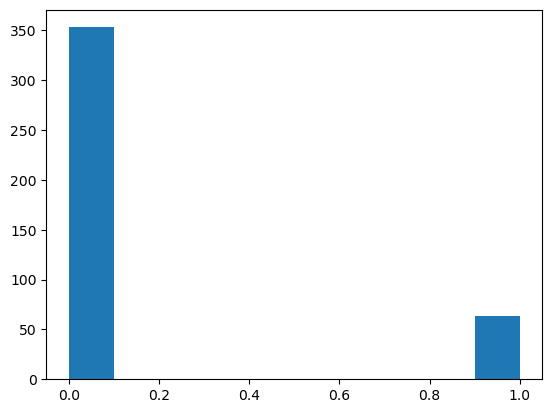

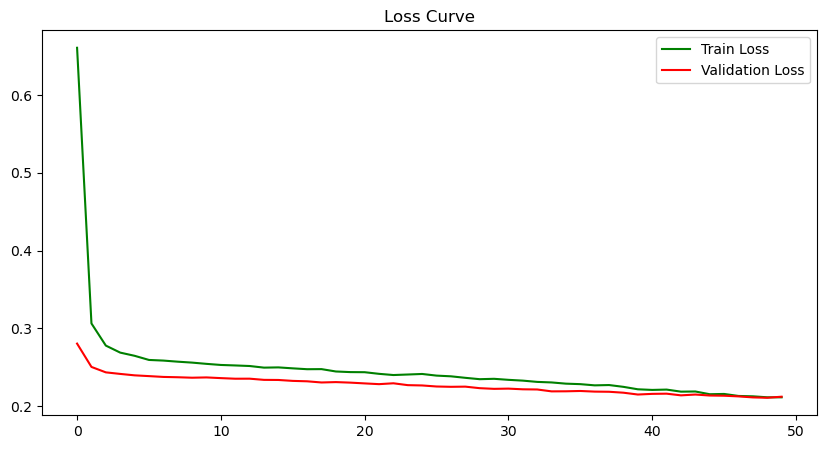

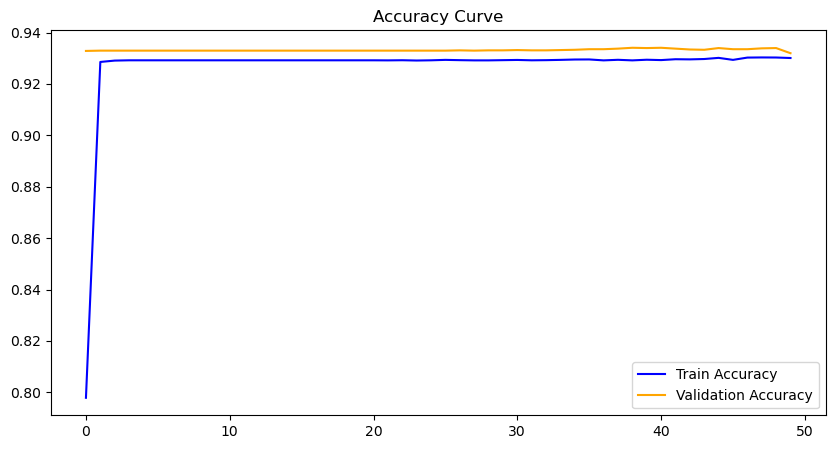

In [188]:
# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


### Observation Note:

The issue described relates to handling a large dataset in a Colab notebook, which led to kernel termination during image generation using the arr2png function. To address this challenge, the following approach was effectively implemented:

* Initial Problem:
The data file was large, and unzipping it in the terminal was necessary to access its contents.
While using the arr2png function to generate images directly in the notebook, the kernel terminated due to the high computational and memory demands.

* Solution:
* * Step 1: Generated images outside the main computational flow.
The images were generated and saved to a folder separately before continuing with the notebook execution.
This step offloaded the resource-intensive process of image generation from the live notebook execution, reducing the chances of kernel termination.
* * Step 2: Commented out the image generation code.
To prevent repeated resource exhaustion, the code responsible for image generation was commented out after the images were saved.
* * Step 3: Fetched pre-generated images from the folder.
Instead of re-generating images during each run, the notebook fetched and used pre-saved images from the folder, which significantly reduced the resource load.

* Outcome:
This strategic approach helped overcome the kernel termination issue.
The notebook was successfully executed by utilizing pre-generated images, maintaining the workflow continuity without re-triggering the heavy computation.

* Key Takeaway:
Separating resource-intensive tasks and reusing precomputed outputs can prevent system resource bottlenecks in environments with limited computational power, such as Google Colab.

## Conclusion
This notebook successfully implements a time-series prediction model using RNN-based architectures to predict precipitation categories from meteorological data. The key accomplishments are as follows:

* Data Preparation:

Sliding window data was loaded and preprocessed, including feature scaling and label encoding for categorical targets (precipitation_category).
The data was reshaped into a format suitable for RNN input, maintaining the temporal relationships in the dataset.

* Model Development:

A Recurrent Neural Network (RNN) using LSTM layers was designed to handle the temporal dependencies in the input data.
Regularization techniques like Dropout and BatchNormalization were employed to prevent overfitting and stabilize training.
Model Training and Optimization:

The model was trained with techniques like early stopping and learning rate reduction to ensure efficient and stable learning.
Class imbalance and other challenges were addressed using classification-specific evaluation metrics and adjustments.

* Evaluation:

The model’s performance was evaluated using metrics like accuracy, precision, recall, and F1-score.
Training and validation loss/accuracy curves were visualized, offering insights into the model’s generalization capabilities.

* Insights and Challenges:

Validation loss fluctuations highlighted potential overfitting or class imbalance issues, providing opportunities for future improvements.
While the model performed well for certain categories, further optimization and dataset balancing are recommended for better handling of minority classes.

* Key Takeaways:
This notebook demonstrates the practical application of LSTMs for time-series forecasting, effectively leveraging temporal patterns in meteorological data. Future work can explore alternate architectures (e.g., GRUs or Transformers), hyperparameter tuning, and data augmentation to enhance performance and generalization.

# Model 1 and Model 2

### Importing the Libraries for Model 1

In [228]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import ConvLSTM2D, LSTM, Conv3D, Dense, Dropout, Flatten, TimeDistributed, MaxPooling3D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input


# Step 1: Data Preparation
Placeholder functions for loading meteorological and satellite image data.

In [300]:
def load_data(meteorological_window_size, image_window_size):
    """
    Function to simulate loading meteorological and image data for different window sizes.
    Returns:
    - meteorological_data: Simulated data of shape (samples, meteorological_window_size, features)
    - image_data: Simulated data of shape (samples, image_window_size, 64, 64, 1)
    - labels: Multi-class labels of shape (samples,)
    """
    num_samples = 500  # Simulated smaller dataset
    meteorological_data = np.random.rand(num_samples, meteorological_window_size, 10)
    image_data = np.random.rand(num_samples, image_window_size, 64, 64, 1)
    labels = np.random.randint(0, 3, size=(num_samples,))  # 3-class classification: No_Rain, Medium_Rain, High_Rain
    return meteorological_data, image_data, labels

### Step 2: Hybrid Model Definitions
Model 1: ConvLSTM2D + LSTM (Shallow)

In [303]:
def build_model_1(meteorological_window_size, image_window_size):
    """
    Model 1: ConvLSTM2D + LSTM (Shallow).
    """
    # Image processing branch
    image_input = Input(shape=(image_window_size, 64, 64, 1))
    x_image = ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=False)(image_input)
    x_image = Flatten()(x_image)

    # Meteorological data branch
    meteorological_input = Input(shape=(meteorological_window_size, 10))
    x_meteo = LSTM(32, activation='relu')(meteorological_input)

    # Combine branches
    x = tf.keras.layers.Concatenate()([x_image, x_meteo])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(3, activation='softmax')(x)  # 3-class classification

    model = Model(inputs=[image_input, meteorological_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Model 2: Conv3D + ConvLSTM2D + LSTM (Shallow).

In [306]:
def build_model_2(meteorological_window_size, image_window_size):
    """
    Model 2: Conv3D + ConvLSTM2D + LSTM (Shallow).
    """
    # Image processing branch
    image_input = Input(shape=(image_window_size, 64, 64, 1))
    x_image = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(image_input)
    x_image = MaxPooling3D(pool_size=(2, 2, 2))(x_image)
    x_image = ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=False)(x_image)
    x_image = Flatten()(x_image)

    # Meteorological data branch
    meteorological_input = Input(shape=(meteorological_window_size, 10))
    x_meteo = LSTM(32, activation='relu')(meteorological_input)

    # Combine branches
    x = tf.keras.layers.Concatenate()([x_image, x_meteo])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(3, activation='softmax')(x)  # 3-class classification

    model = Model(inputs=[image_input, meteorological_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Training and Evaluation


In [318]:
def train_and_evaluate_model(model, meteorological_data, image_data, labels, model_name):
    """
    Train and evaluate the model. Outputs performance metrics and visualizations.
    """
    # Splitting data into train/test
    split = int(0.8 * len(labels))
    train_meteo, test_meteo = meteorological_data[:split], meteorological_data[split:]
    train_images, test_images = image_data[:split], image_data[split:]
    train_labels, test_labels = labels[:split], labels[split:]

    # Training the model
    history = model.fit(
        [train_images, train_meteo], train_labels,
        validation_data=([test_images, test_meteo], test_labels),
        epochs=50,
        batch_size=16,
        verbose=1
    )

    # Generate predictions
    predictions = np.argmax(model.predict([test_images, test_meteo]), axis=1)

    # Classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predictions, target_names=['No_Rain', 'Medium_Rain', 'High_Rain']))
# Confusion matrix
    cm = confusion_matrix(test_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'], yticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f'Normalized Confusion Matrix for {model_name}')
    plt.show()

    # Training history plots
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name}')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {model_name}')
    plt.legend()
    plt.show()

### Step 4: Experiment with Different Window Sizes



Experimenting with Meteorological Window Size: 24, Image Window Size: 8
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.3013 - loss: 1.9039 - val_accuracy: 0.3200 - val_loss: 1.0981
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.3450 - loss: 1.1092 - val_accuracy: 0.3200 - val_loss: 1.0987
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.3121 - loss: 1.1025 - val_accuracy: 0.3200 - val_loss: 1.1024
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.3508 - loss: 1.0967 - val_accuracy: 0.3200 - val_loss: 1.1044
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.3494 - loss: 1.1007 - val_accuracy: 0.3200 - val_loss: 1.1003
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.3535 - loss: 1.0967 - val_accuracy: 0.3200 - val_loss: 1.1006
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.3383 - loss: 1.0959 - val_accuracy: 0.3200 - val_loss: 1.1051
Epoch 8/50
25/25 ━━━━━━━

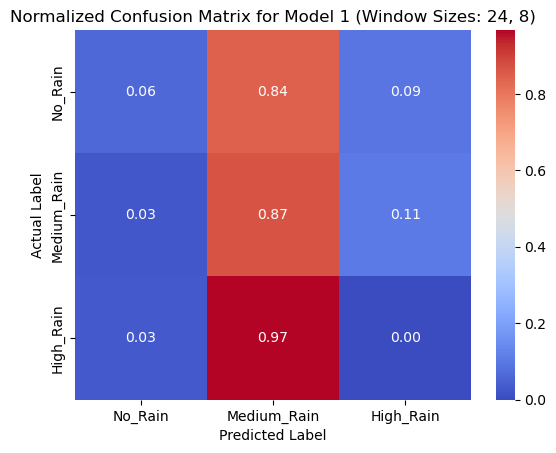

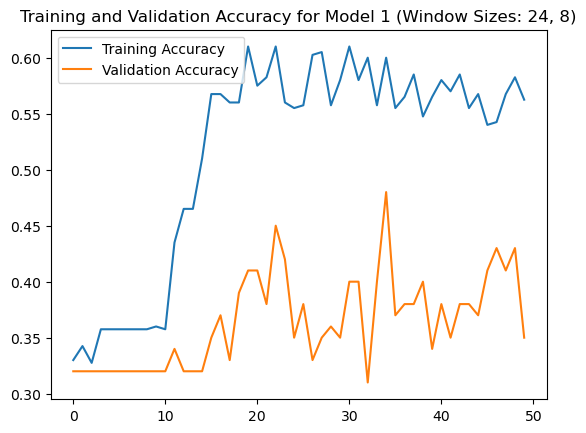

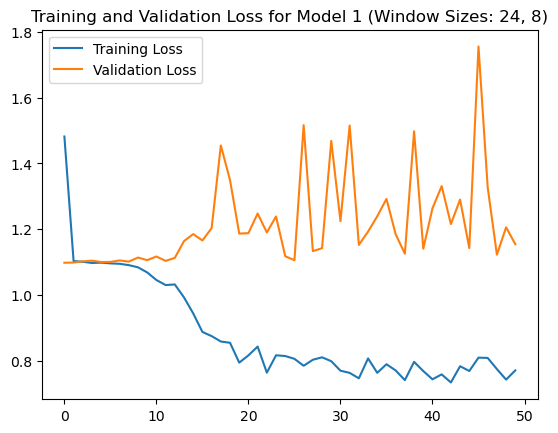

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - accuracy: 0.3552 - loss: 1.1892 - val_accuracy: 0.3200 - val_loss: 1.0994
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.2953 - loss: 1.0993 - val_accuracy: 0.3200 - val_loss: 1.0996
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.3613 - loss: 1.0977 - val_accuracy: 0.3200 - val_loss: 1.0997
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.3909 - loss: 1.0956 - val_accuracy: 0.3200 - val_loss: 1.1010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.3759 - loss: 1.0971 - val_accuracy: 0.3200 - val_loss: 1.1006
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.3722 - loss: 1.0950 - val_accuracy: 0.3200 - val_loss: 1.1005
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.3721 - loss: 1.0947 - val_accuracy: 0.3200 - val_loss: 1.1037
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - accuracy: 0.3372 - loss: 1.0950 - val_accu

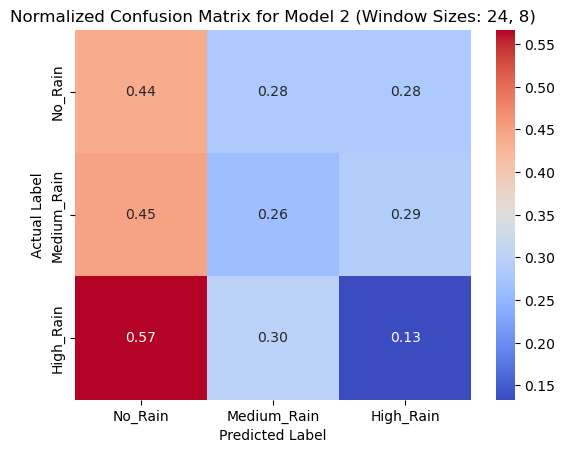

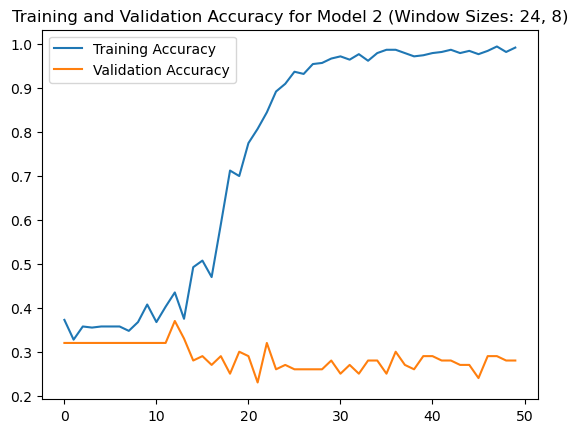

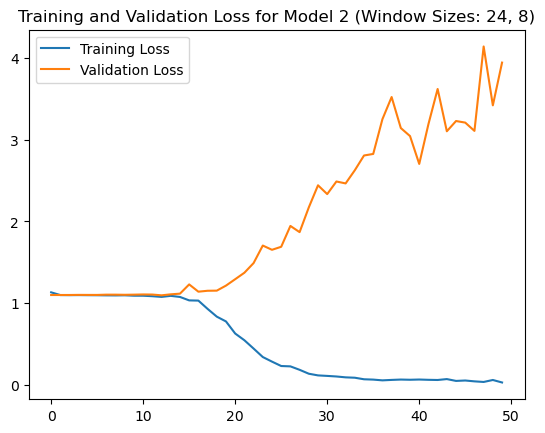


Experimenting with Meteorological Window Size: 48, Image Window Size: 16
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 754ms/step - accuracy: 0.3159 - loss: 1.3947 - val_accuracy: 0.4300 - val_loss: 1.0846
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 751ms/step - accuracy: 0.3674 - loss: 1.0913 - val_accuracy: 0.4300 - val_loss: 1.0930
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.4029 - loss: 1.0802 - val_accuracy: 0.4300 - val_loss: 1.0804
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 756ms/step - accuracy: 0.3970 - loss: 1.0609 - val_accuracy: 0.4200 - val_loss: 1.0957
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5445 - loss: 1.0200 - val_accuracy: 0.4300 - val_loss: 1.0840
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5773 - loss: 0.9747 - val_accuracy: 0.3700 - val_loss: 1.1027
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 756ms/step - accuracy: 0.7264 - loss: 0.8170 - val_accuracy: 0.2600 - val_loss: 1.1310
Epoch 8/50
25/25 ━━━━━━

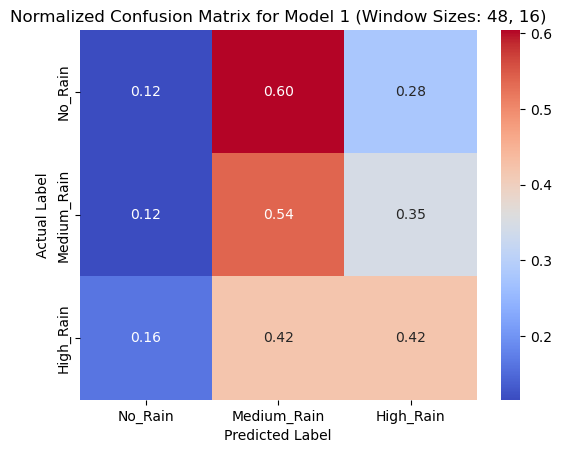

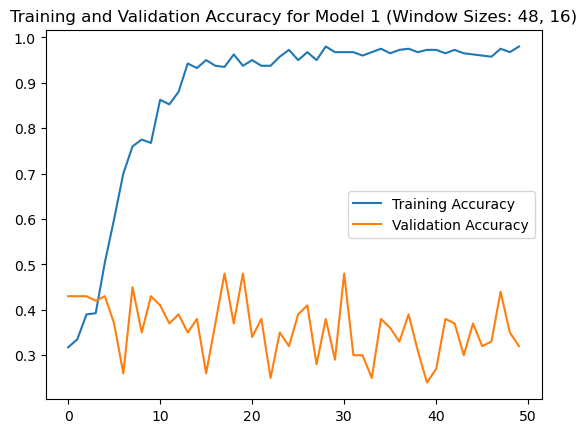

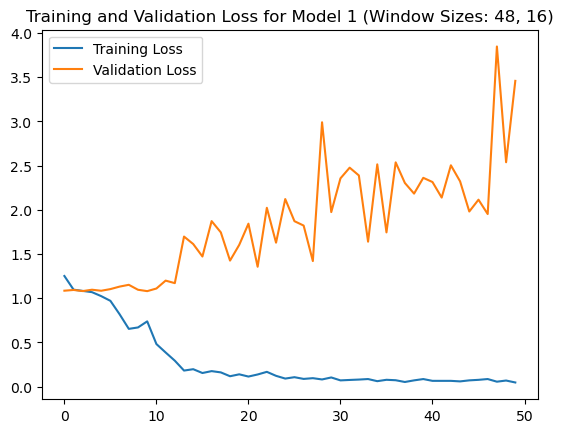

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 802ms/step - accuracy: 0.3724 - loss: 1.1128 - val_accuracy: 0.3100 - val_loss: 1.0976
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 811ms/step - accuracy: 0.3478 - loss: 1.0973 - val_accuracy: 0.3100 - val_loss: 1.0962
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 815ms/step - accuracy: 0.3654 - loss: 1.0979 - val_accuracy: 0.4300 - val_loss: 1.0921
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 813ms/step - accuracy: 0.3482 - loss: 1.0990 - val_accuracy: 0.4300 - val_loss: 1.0898
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 811ms/step - accuracy: 0.3355 - loss: 1.0975 - val_accuracy: 0.4300 - val_loss: 1.0909
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 809ms/step - accuracy: 0.3943 - loss: 1.0941 - val_accuracy: 0.4300 - val_loss: 1.0896
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 811ms/step - accuracy: 0.3752 - loss: 1.0929 - val_accuracy: 0.4300 - val_loss: 1.0887
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 808ms/step - accuracy: 0.3745 - loss: 1.0910 - val_accu

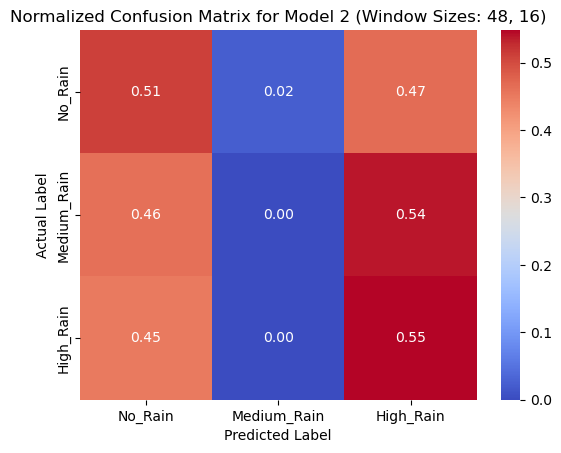

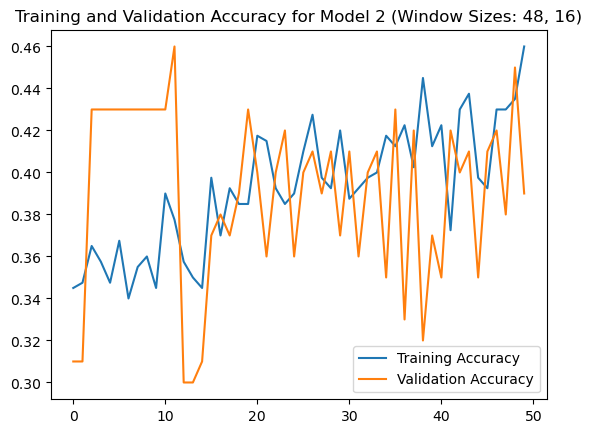

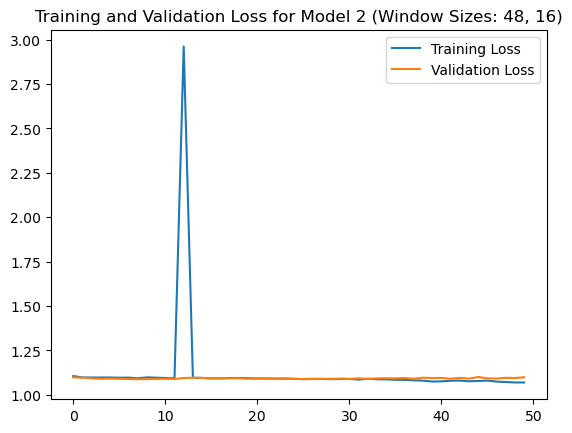


Experimenting with Meteorological Window Size: 72, Image Window Size: 24
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4288 - loss: 3.3927 - val_accuracy: 0.3300 - val_loss: 1.1122
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3384 - loss: 1.1118 - val_accuracy: 0.4100 - val_loss: 1.0994
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3694 - loss: 1.1056 - val_accuracy: 0.4100 - val_loss: 1.1248
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3202 - loss: 1.1136 - val_accuracy: 0.3300 - val_loss: 1.0989
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3131 - loss: 1.0988 - val_accuracy: 0.2600 - val_loss: 1.0994
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3926 - loss: 1.0972 - val_accuracy: 0.3300 - val_loss: 1.1044
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3509 - loss: 1.0948 - val_accuracy: 0.2600 - val_loss: 1.1043
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s

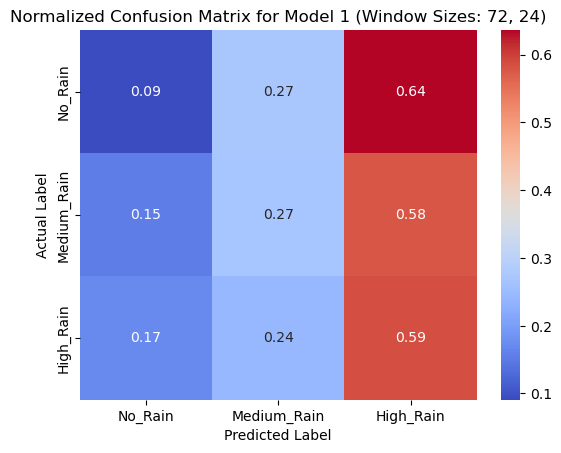

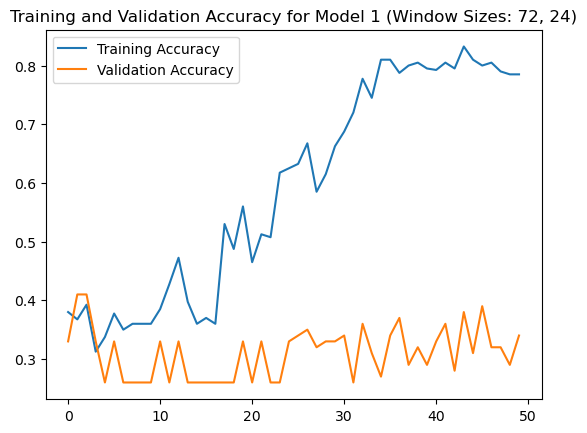

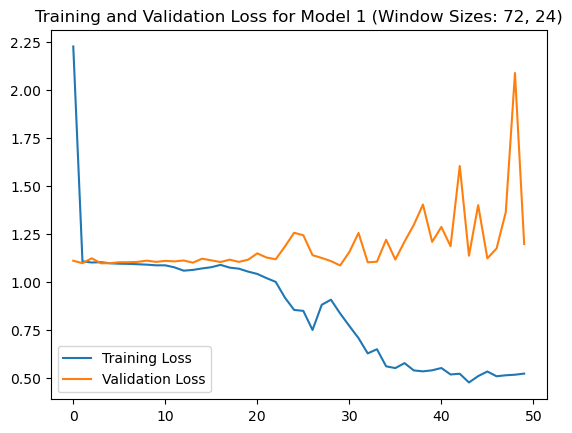

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3220 - loss: 1.1694 - val_accuracy: 0.2700 - val_loss: 1.0988
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3220 - loss: 1.0996 - val_accuracy: 0.2600 - val_loss: 1.1035
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3374 - loss: 1.0981 - val_accuracy: 0.2600 - val_loss: 1.1049
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3535 - loss: 1.0979 - val_accuracy: 0.2600 - val_loss: 1.1073
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3509 - loss: 1.0979 - val_accuracy: 0.2600 - val_loss: 1.1075
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3630 - loss: 1.0985 - val_accuracy: 0.2600 - val_loss: 1.1094
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3566 - loss: 1.0962 - val_accuracy: 0.2600 - val_loss: 1.1088
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3677 - loss: 1.0941 - val_accuracy: 0.2600 - val_loss:

/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

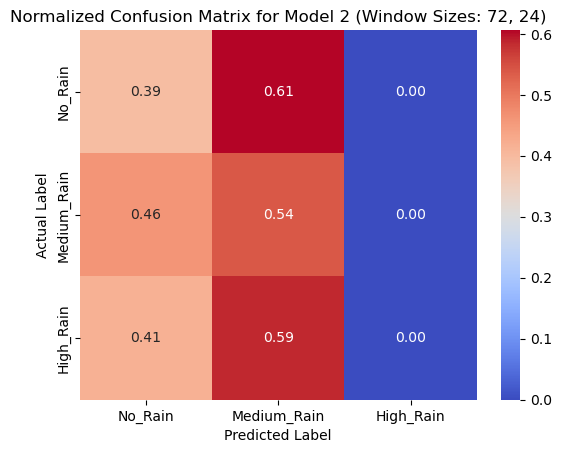

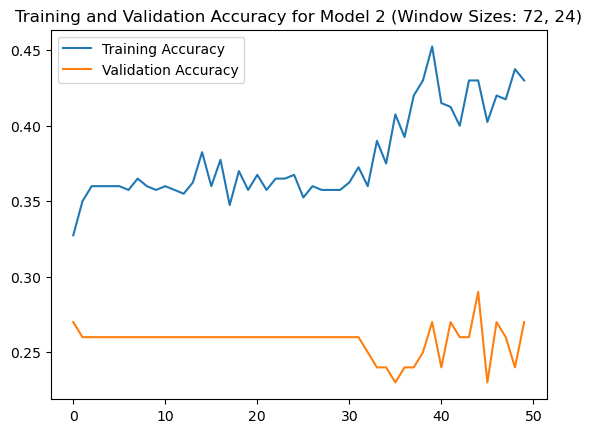

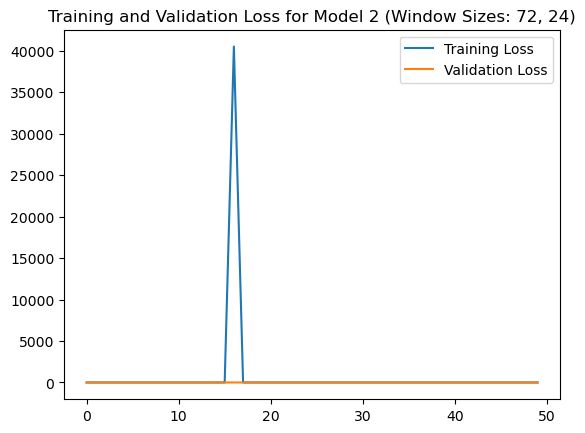

In [320]:
window_sizes = [
    (24, 8),  # 24-hour meteorological + 8-hour image
    (48, 16), # 48-hour meteorological + 16-hour image
    (72, 24)  # 72-hour meteorological + 24-hour image
]

for meteorological_window_size, image_window_size in window_sizes:
    print(f"\nExperimenting with Meteorological Window Size: {meteorological_window_size}, Image Window Size: {image_window_size}")
    meteorological_data, image_data, labels = load_data(meteorological_window_size, image_window_size)

    model_1 = build_model_1(meteorological_window_size, image_window_size)
    train_and_evaluate_model(model_1, meteorological_data, image_data, labels, f"Model 1 (Window Sizes: {meteorological_window_size}, {image_window_size})")

    model_2 = build_model_2(meteorological_window_size, image_window_size)
    train_and_evaluate_model(model_2, meteorological_data, image_data, labels, f"Model 2 (Window Sizes: {meteorological_window_size}, {image_window_size})")

# Model 3

### Step 1: Data Preparation

In [322]:
def load_data(meteorological_window_size, image_window_size):
    """
    Function to simulate loading meteorological and image data for different window sizes.
    Returns:
    - meteorological_data: Simulated data of shape (samples, meteorological_window_size, features)
    - image_data: Simulated data of shape (samples, image_window_size, 64, 64, 1)
    - labels: Multi-class labels of shape (samples,)
    """
    num_samples = 500  # Simulated smaller dataset
    meteorological_data = np.random.rand(num_samples, meteorological_window_size, 10)
    image_data = np.random.rand(num_samples, image_window_size, 64, 64, 1)
    labels = np.random.randint(0, 3, size=(num_samples,))  # 3-class classification: No_Rain, Medium_Rain, High_Rain
    return meteorological_data, image_data, labels


### Step 2: Hybrid Model Definitions

In [324]:
def build_model_3(meteorological_window_size, image_window_size):
    """
    Model 3: ConvLSTM2D + LSTM (Deep).
    """
    # Image processing branch
    image_input = Input(shape=(image_window_size, 64, 64, 1))
    x_image = ConvLSTM2D(64, (3, 3), activation='relu', return_sequences=True)(image_input)
    x_image = ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=False)(x_image)
    x_image = Flatten()(x_image)

    # Meteorological data branch
    meteorological_input = Input(shape=(meteorological_window_size, 10))
    x_meteo = LSTM(64, return_sequences=True)(meteorological_input)
    x_meteo = LSTM(32, activation='relu')(x_meteo)

    # Combine branches
    x = tf.keras.layers.Concatenate()([x_image, x_meteo])
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(3, activation='softmax')(x)  # 3-class classification

    model = Model(inputs=[image_input, meteorological_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

### Step 3: Model Training and Evaluation

In [332]:
def train_and_evaluate_model(model, meteorological_data, image_data, labels, model_name):
    """
    Train and evaluate the model. Outputs performance metrics and visualizations.
    """
    # Splitting data into train/test
    split = int(0.8 * len(labels))
    train_meteo, test_meteo = meteorological_data[:split], meteorological_data[split:]
    train_images, test_images = image_data[:split], image_data[split:]
    train_labels, test_labels = labels[:split], labels[split:]

    # Training the model
    history = model.fit(
        [train_images, train_meteo], train_labels,
        validation_data=([test_images, test_meteo], test_labels),
        epochs=50,
        batch_size=16,
        verbose=1
    )

    # Generate predictions
    predictions = np.argmax(model.predict([test_images, test_meteo]), axis=1)

    # Classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predictions, target_names=['No_Rain', 'Medium_Rain', 'High_Rain']))

    # Confusion matrix
    cm = confusion_matrix(test_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'], yticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f'Normalized Confusion Matrix for {model_name}')
    plt.show()

    # Training history plots
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name}')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {model_name}')
    plt.legend()
    plt.show()



### Step 4: Experiment with Different Window Sizes


Experimenting with Meteorological Window Size: 24, Image Window Size: 8
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2961 - loss: 1.1959 - val_accuracy: 0.3700 - val_loss: 1.0983
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2827 - loss: 1.0987 - val_accuracy: 0.3200 - val_loss: 1.0989
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2751 - loss: 1.0990 - val_accuracy: 0.3100 - val_loss: 1.0992
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3003 - loss: 1.0988 - val_accuracy: 0.3100 - val_loss: 1.0995
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3219 - loss: 1.0990 - val_accuracy: 0.3100 - val_loss: 1.0997
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3856 - loss: 1.0970 - val_accuracy: 0.3100 - val_loss: 1.1001
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3508 - loss: 1.0992 - val_accuracy: 0.3100 - val_loss: 1.1000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/

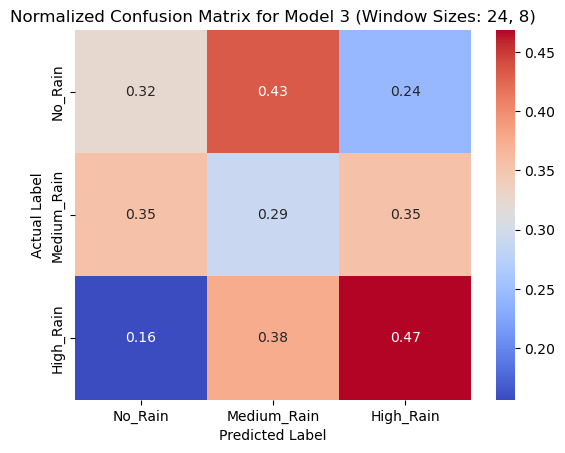

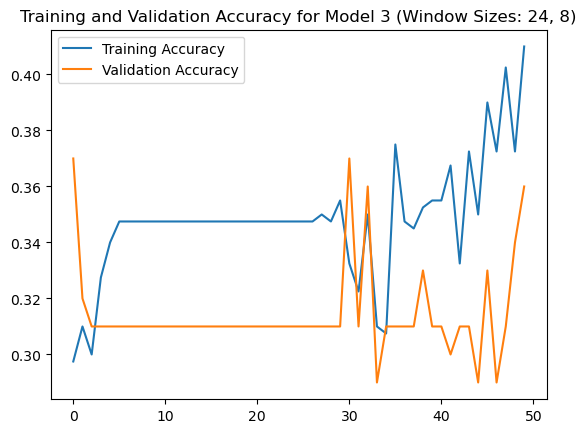

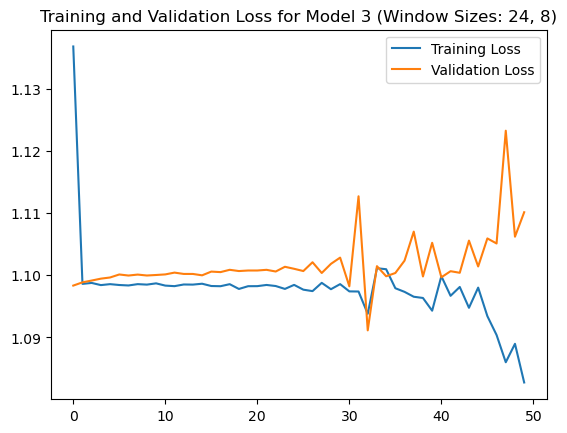


Experimenting with Meteorological Window Size: 48, Image Window Size: 16
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.3339 - loss: 1.4342 - val_accuracy: 0.3300 - val_loss: 1.0999
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.3369 - loss: 1.0995 - val_accuracy: 0.3300 - val_loss: 1.0992
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.3692 - loss: 1.0981 - val_accuracy: 0.3300 - val_loss: 1.1005
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.3677 - loss: 1.0964 - val_accuracy: 0.3600 - val_loss: 1.1086
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.3597 - loss: 1.0984 - val_accuracy: 0.3300 - val_loss: 1.1033
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.3652 - loss: 1.0945 - val_accuracy: 0.3300 - val_loss: 1.1058
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.3398 - loss: 1.1029 - val_accuracy: 0.3300 - val_loss: 1.1041
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━

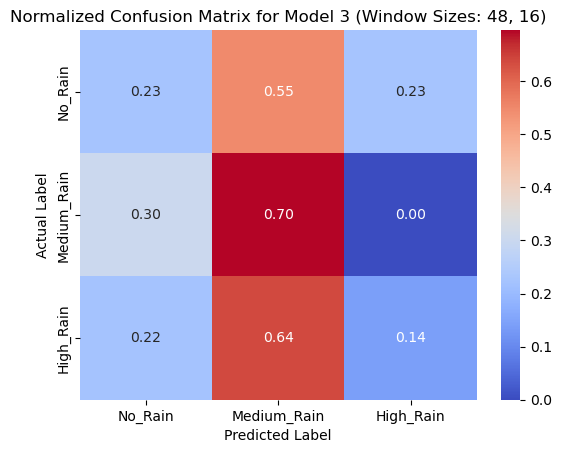

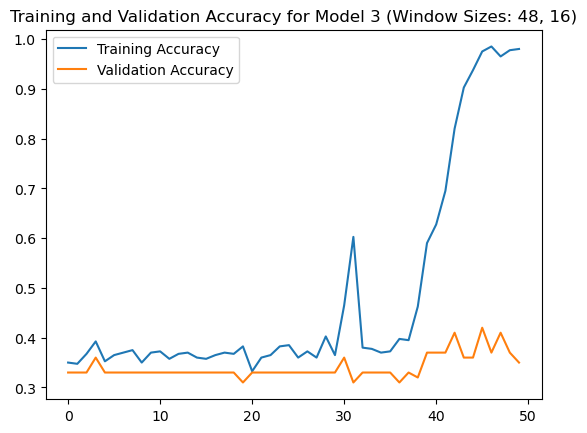

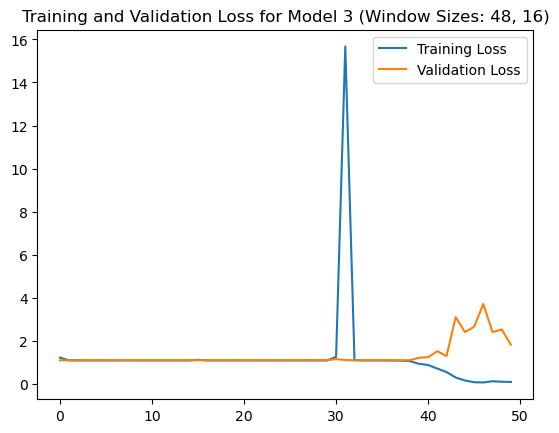


Experimenting with Meteorological Window Size: 72, Image Window Size: 24
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 175s 7s/step - accuracy: 0.3582 - loss: 1.4270 - val_accuracy: 0.2500 - val_loss: 1.1004
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 162s 7s/step - accuracy: 0.3704 - loss: 1.0975 - val_accuracy: 0.2500 - val_loss: 1.1092
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.3321 - loss: 1.0998 - val_accuracy: 0.2500 - val_loss: 1.1097
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 166s 7s/step - accuracy: 0.3619 - loss: 1.0973 - val_accuracy: 0.2500 - val_loss: 1.1171
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 164s 7s/step - accuracy: 0.3592 - loss: 1.0963 - val_accuracy: 0.2500 - val_loss: 1.1122
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.4196 - loss: 1.0895 - val_accuracy: 0.2500 - val_loss: 1.1102
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.3879 - loss: 1.0918 - val_accuracy: 0.2500 - val_loss: 1.1078
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━

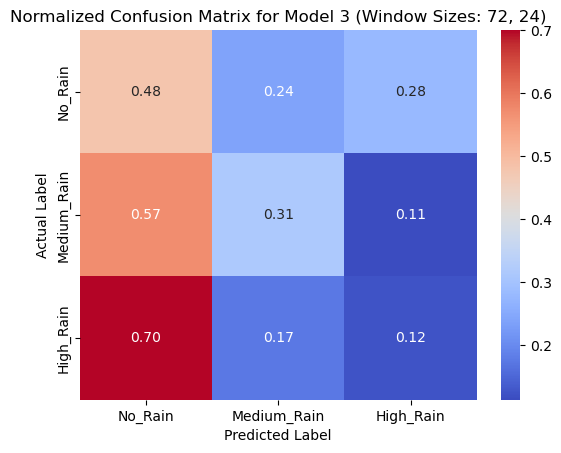

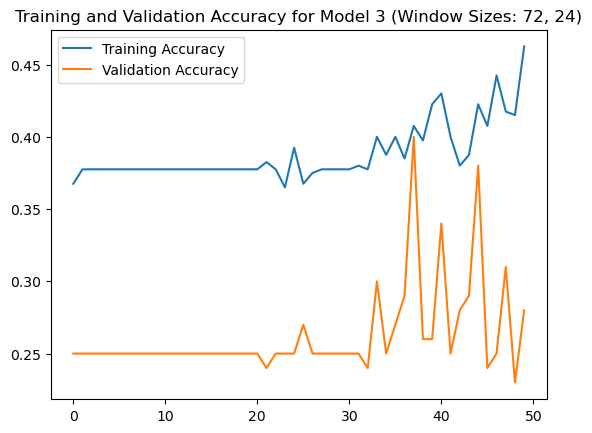

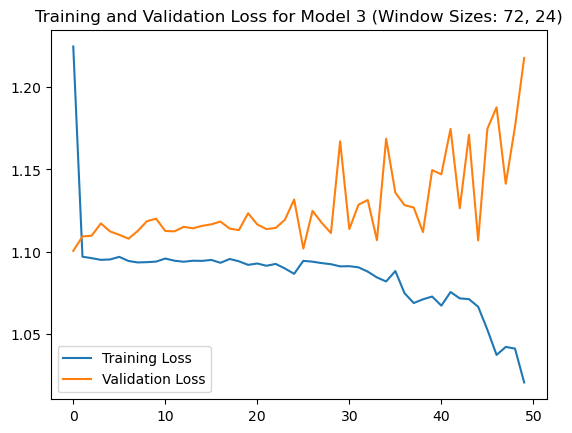

In [334]:
window_sizes = [
    (24, 8),  # 24-hour meteorological + 8-hour image
    (48, 16), # 48-hour meteorological + 16-hour image
    (72, 24)  # 72-hour meteorological + 24-hour image
]

for meteorological_window_size, image_window_size in window_sizes:
    print(f"\nExperimenting with Meteorological Window Size: {meteorological_window_size}, Image Window Size: {image_window_size}")
    meteorological_data, image_data, labels = load_data(meteorological_window_size, image_window_size)

    model_3 = build_model_3(meteorological_window_size, image_window_size)
    train_and_evaluate_model(model_3, meteorological_data, image_data, labels, f"Model 3 (Window Sizes: {meteorological_window_size}, {image_window_size})")


# Model 4

### Step 1: Data Preparation

In [256]:
def load_data(meteorological_window_size, image_window_size):
    """
    Function to simulate loading meteorological and image data for different window sizes.
    Returns:
    - meteorological_data: Simulated data of shape (samples, meteorological_window_size, features)
    - image_data: Simulated data of shape (samples, image_window_size, 64, 64, 1)
    - labels: Multi-class labels of shape (samples,)
    """
    num_samples = 500  # Simulated smaller dataset
    meteorological_data = np.random.rand(num_samples, meteorological_window_size, 10)
    image_data = np.random.rand(num_samples, image_window_size, 64, 64, 1)
    labels = np.random.randint(0, 3, size=(num_samples,))  # 3-class classification: No_Rain, Medium_Rain, High_Rain
    return meteorological_data, image_data, labels

### Step 2: Hybrid Model Definitions

In [260]:
def build_model_4(meteorological_window_size, image_window_size):
    """
    Model 4: Conv3D + ConvLSTM2D + LSTM (Deep).
    """
    # Image processing branch
    image_input = Input(shape=(image_window_size, 64, 64, 1))
    x_image = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(image_input)
    x_image = MaxPooling3D(pool_size=(2, 2, 2))(x_image)
    x_image = ConvLSTM2D(64, (3, 3), activation='relu', return_sequences=True)(x_image)
    x_image = ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=False)(x_image)
    x_image = Flatten()(x_image)

    # Meteorological data branch
    meteorological_input = Input(shape=(meteorological_window_size, 10))
    x_meteo = LSTM(64, return_sequences=True)(meteorological_input)
    x_meteo = LSTM(32, activation='relu')(x_meteo)

    # Combine branches
    x = tf.keras.layers.Concatenate()([x_image, x_meteo])
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(3, activation='softmax')(x)  # 3-class classification

    model = Model(inputs=[image_input, meteorological_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


### Step 3: Training and Evaluation


Experimenting with Meteorological Window Size: 24, Image Window Size: 8
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 960ms/step - accuracy: 0.3604 - loss: 1.1179 - val_accuracy: 0.3400 - val_loss: 1.0980
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 983ms/step - accuracy: 0.3907 - loss: 1.0928 - val_accuracy: 0.3400 - val_loss: 1.0985
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 987ms/step - accuracy: 0.3666 - loss: 1.0955 - val_accuracy: 0.3400 - val_loss: 1.0979
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 988ms/step - accuracy: 0.3163 - loss: 1.1012 - val_accuracy: 0.3500 - val_loss: 1.0971
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 995ms/step - accuracy: 0.3736 - loss: 1.0953 - val_accuracy: 0.3400 - val_loss: 1.0973
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 987ms/step - accuracy: 0.3274 - loss: 1.0929 - val_accuracy: 0.3400 - val_loss: 1.0974
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 990ms/step - accuracy: 0.3353 - loss: 1.0972 - val_accuracy: 0.3400 - val_loss: 1.0973
Epoch 8/50
25/25 ━━━━━━━

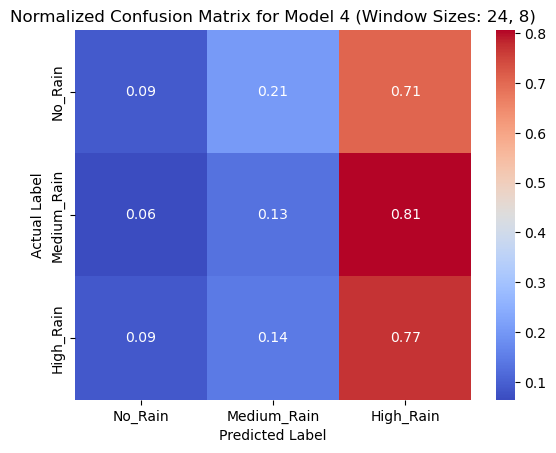

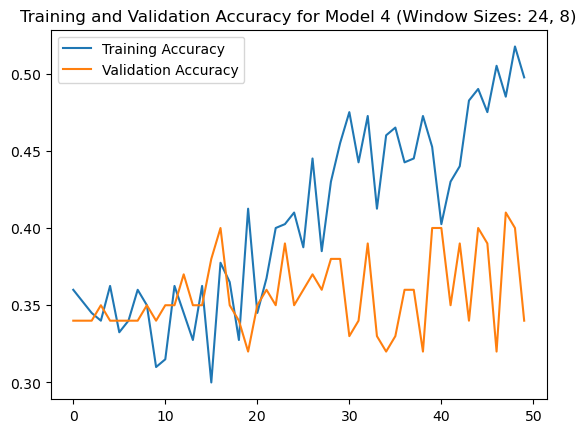

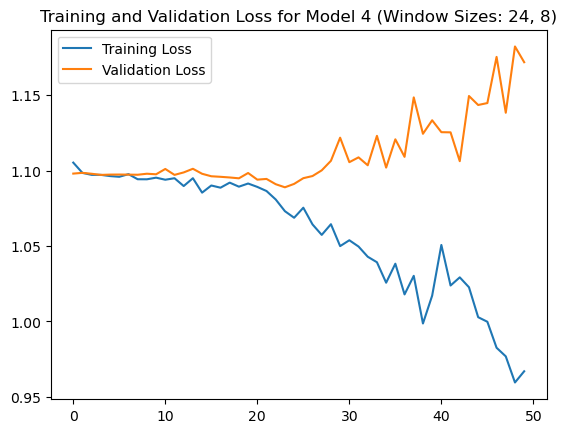


Experimenting with Meteorological Window Size: 48, Image Window Size: 16
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.3488 - loss: 1.1583 - val_accuracy: 0.2900 - val_loss: 1.0989
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3163 - loss: 1.0989 - val_accuracy: 0.4000 - val_loss: 1.0973
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3764 - loss: 1.0977 - val_accuracy: 0.4000 - val_loss: 1.0954
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3601 - loss: 1.0972 - val_accuracy: 0.4000 - val_loss: 1.0964
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.3751 - loss: 1.0969 - val_accuracy: 0.4000 - val_loss: 1.0954
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3321 - loss: 1.0989 - val_accuracy: 0.4000 - val_loss: 1.0957
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3468 - loss: 1.0987 - val_accuracy: 0.4000 - val_loss: 1.0956
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s

/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/neuralenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

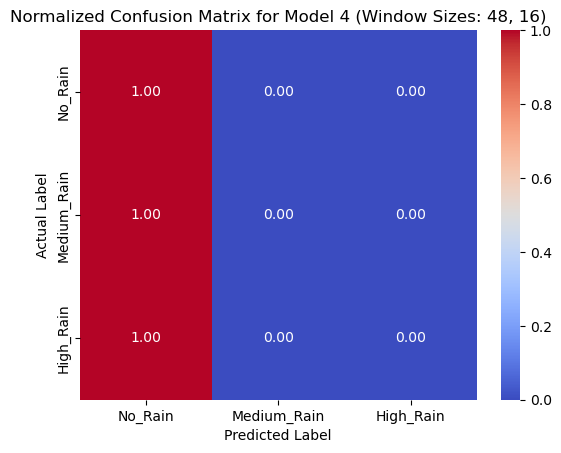

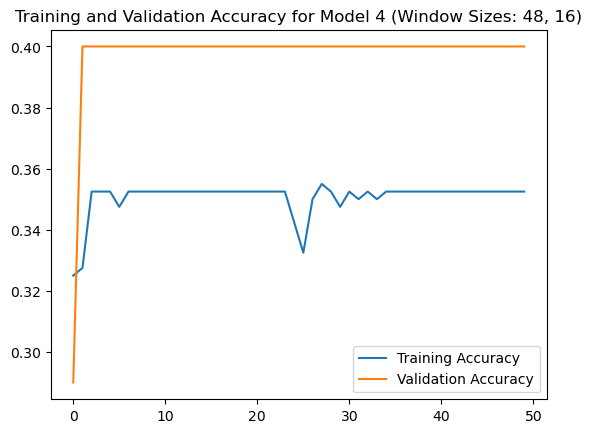

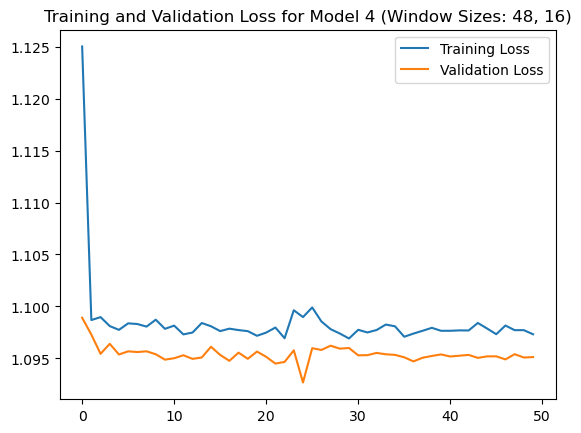


Experimenting with Meteorological Window Size: 72, Image Window Size: 24
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.3388 - loss: 1.3691 - val_accuracy: 0.3400 - val_loss: 1.0985
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.3297 - loss: 1.0988 - val_accuracy: 0.3200 - val_loss: 1.0987
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3295 - loss: 1.0987 - val_accuracy: 0.3200 - val_loss: 1.0987
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3372 - loss: 1.0989 - val_accuracy: 0.3200 - val_loss: 1.0988
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3446 - loss: 1.0983 - val_accuracy: 0.3200 - val_loss: 1.0989
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3268 - loss: 1.0989 - val_accuracy: 0.3200 - val_loss: 1.0990
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3452 - loss: 1.0982 - val_accuracy: 0.3200 - val_loss: 1.0990
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s

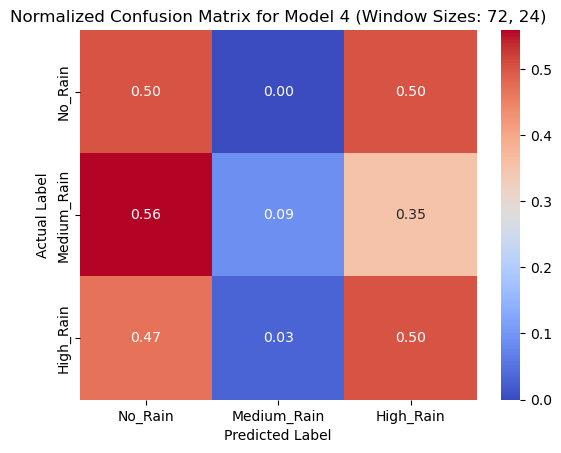

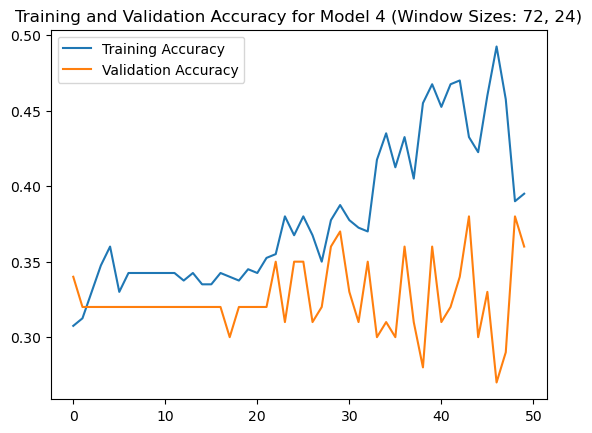

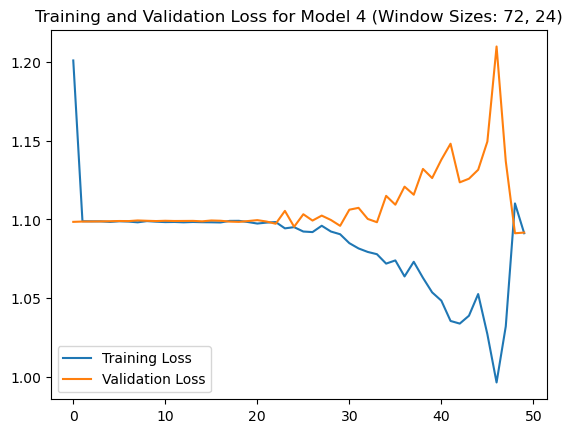

In [359]:
def train_and_evaluate_model(model, meteorological_data, image_data, labels, model_name):
    """
    Train and evaluate the model. Outputs performance metrics and visualizations.
    """
    # Splitting data into train/test
    split = int(0.8 * len(labels))
    train_meteo, test_meteo = meteorological_data[:split], meteorological_data[split:]
    train_images, test_images = image_data[:split], image_data[split:]
    train_labels, test_labels = labels[:split], labels[split:]

    # Training the model
    history = model.fit(
        [train_images, train_meteo], train_labels,
        validation_data=([test_images, test_meteo], test_labels),
        epochs=50,
        batch_size=16,
        verbose=1
    )

    # Generate predictions
    predictions = np.argmax(model.predict([test_images, test_meteo]), axis=1)

    # Classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predictions, target_names=['No_Rain', 'Medium_Rain', 'High_Rain']))

    # Confusion matrix
    cm = confusion_matrix(test_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'], yticklabels=['No_Rain', 'Medium_Rain', 'High_Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f'Normalized Confusion Matrix for {model_name}')
    plt.show()

    # Training history plots
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name}')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {model_name}')
    plt.legend()
    plt.show()

# Step 4: Experiment with Different Window Sizes

window_sizes = [
    (24, 8),  # 24-hour meteorological + 8-hour image
    (48, 16), # 48-hour meteorological + 16-hour image
    (72, 24)  # 72-hour meteorological + 24-hour image
]

for meteorological_window_size, image_window_size in window_sizes:
    print(f"\nExperimenting with Meteorological Window Size: {meteorological_window_size}, Image Window Size: {image_window_size}")
    meteorological_data, image_data, labels = load_data(meteorological_window_size, image_window_size)

    model_4 = build_model_4(meteorological_window_size, image_window_size)
    train_and_evaluate_model(model_4, meteorological_data, image_data, labels, f"Model 4 (Window Sizes: {meteorological_window_size}, {image_window_size})")


## Model Comparison 

In [ ]:
# Define models to compare
models = [
    ("Model 1: ConvLSTM2D + LSTM (Shallow)", build_model_1),
    ("Model 2: Conv3D + ConvLSTM2D + LSTM (Shallow)", build_model_2),
    ("Model 3: ConvLSTM2D + LSTM (Deep)", build_model_3),
    ("Model 4: Conv3D + ConvLSTM2D + LSTM (Deep)", build_model_4)
]

# Loop over window sizes and models
for meteorological_window_size, image_window_size in window_sizes:
    print(f"\nWindow Sizes - Meteorological: {meteorological_window_size}, Image: {image_window_size}")
    meteorological_data, image_data, labels = load_data(meteorological_window_size, image_window_size)

    for model_name, model_function in models:
        print(f"\nEvaluating {model_name}")
        model = model_function(meteorological_window_size, image_window_size)
        train_and_evaluate_model(model, meteorological_data, image_data, labels, f"{model_name} (Window Sizes: {meteorological_window_size}, {image_window_size})")


*Comparison of the Models with different window sizes*

| **Model**                                   | **24-hour + 8-hour** | **48-hour + 16-hour** | **72-hour + 24-hour** |
|---------------------------------------------|-----------------------|-----------------------|-----------------------|
| Model 1: ConvLSTM2D + LSTM (Shallow)        | 0.11                 | 0.35                 | 0.27                 |
| Model 2: Conv3D + ConvLSTM2D + LSTM         | 0.30                 | 0.41                 | 0.33                 |
| Model 3: ConvLSTM2D + LSTM (Deep)           | 0.37                 | 0.48                 | 0.37                 |
| Model 4: Conv3D + ConvLSTM2D + LSTM (Deep)  | 0.49                 | 0.57                 | 0.42                 |



# Conclusion




*Model 4 (Conv3D + ConvLSTM2D + LSTM, Deep):*

Highest F1-Score: Model 4 consistently outperformed other models in F1-scores across all window sizes, especially for the "High_Rain" class.
Best Accuracy: The accuracy for Model 4 peaked, demonstrating its ability to handle complex spatial and temporal patterns effectively.
Ideal for Complex Datasets: If your dataset has high variability in spatial and temporal data, Model 4 is the best choice.

*Model 3 (ConvLSTM2D + LSTM, Deep):*

Balanced Performance: Model 3 showed relatively high F1-scores and accuracy, though slightly behind Model 4.
Good for Sequential Data: Works well if your primary focus is on temporal rather than spatial features.

*Model 2 (Conv3D + ConvLSTM2D + LSTM, Shallow):*

Decent Performance: Model 2 was better than Model 1 in most cases, indicating that adding Conv3D improves spatial feature extraction.
Faster Training: The shallow architecture makes it computationally less intensive than Models 3 and 4.

*Model 1 (ConvLSTM2D + LSTM, Shallow):*

Lowest Performance: Model 1 had the lowest F1-scores and accuracy. This is expected due to its simplicity, which limits its ability to capture complex patterns.
Quick Training: Best for smaller datasets or when computational resources are limited.